In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Path to TPM matrix
counts_path = "GSE202203_TPM_Raw_gene_3207.tsv"

# Load the dataset (genes as rows, samples as columns)
df = pd.read_csv(counts_path, sep="\t", index_col=0)

# Shape and preview
# Preview: first 10 rows and first 8 columns (not sorted, just a general look)
print(f"TPM matrix shape: {df.shape} (genes x samples)")
df.iloc[:10, :8]

TPM matrix shape: (19644, 3207) (genes x samples)


S000001     S000002     S000003     S000006     S000008  \
X                                                                     
A1BG      16.478174   10.738728    5.825205    3.569550   10.570550   
A1CF       0.000000    0.000000    0.000000    0.000000    0.000000   
A2M      341.697182  271.193113  405.936539  443.763556  442.664444   
A2ML1      0.018615   13.440508    1.977336    1.593959    0.000000   
A3GALT2    0.000000    0.000000    0.000000    0.000000    0.000000   
A4GALT    97.046858   24.681445   17.125317    8.906630   38.196549   
A4GNT      0.000000    0.000000    0.000000    0.000000    0.000000   
AAAS      43.867188   48.456172   54.468198   30.273520   46.489009   
AACS      44.845057   29.737530   44.137152   18.824906   35.222443   
AADAC      0.000000    1.395975    0.055308    0.000000    0.000000   

            S000011     S000012     S000013  
X                                            
A1BG      10.720980   13.573573    1.025516  
A1CF       0.000000    0.000000    0.000000  
A2M      435.264298  174.548096  463.620440  
A2ML1      0.000000   12.669721    7.155462  
A3GALT2    0.000000    0.000000    0.000000  
A4GALT    10.293289    4.540354    5.438657  
A4GNT      0.000000    0.000000    0.000000  
AAAS      42.324112   76.958328   21.976972  
AACS      17.180672   55.773714   12.289290  
AADAC      0.311958    0.404968    0.904107

In [3]:
# Get the information about the various data types used and the non-null count of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19644 entries, A1BG to ZZZ3
Columns: 3207 entries, S000001 to S006786
dtypes: float64(3207)
memory usage: 480.8+ MB


In [4]:
# Summary statistics across all genes
df.describe()

S000001       S000002       S000003       S000006       S000008  \
count  19644.000000  19644.000000  19644.000000  19644.000000  19644.000000   
mean      50.906129     50.906129     50.906129     50.906129     50.906129   
std      320.348045    289.833528    470.889894    667.256022    310.289351   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.163009      0.214257      0.381534      0.207912      0.259452   
50%        7.029922      8.702183      7.916783      6.032988      7.711683   
75%       28.491185     32.816919     28.069879     22.084175     28.062377   
max    16814.313406  16145.096404  44757.254557  43589.950491  11007.847768   

            S000011       S000012       S000013       S000014       S000015  \
count  19644.000000  19644.000000  19644.000000  19644.000000  19644.000000   
mean      50.906129     50.906129     50.906129     50.906129     50.906129   
std      366.678990    375.944203    467.828088    402.536099    394.830842   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.302666      0.441720      0.250704      0.397188      0.362421   
50%        8.245060      8.410765      8.015539      7.288885      9.715249   
75%       28.991535     30.400986     30.839802     26.909176     32.713319   
max    18300.787928  20491.526890  32690.316937  23450.564362  21213.540965   

       ...       S006771       S006775       S006776       S006777  \
count  ...  19644.000000  19644.000000  19644.000000  19644.000000   
mean   ...     50.906129     50.906129     50.906129     50.906129   
std    ...    575.236366    329.720019    296.455075    602.718819   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.404644      0.341215      0.335918      0.300217   
50%    ...      7.804494      8.171925      8.594853      6.621321   
75%    ...     25.836040     28.234417     32.252992     23.557784   
max    ...  40912.916707  12721.345064  11863.639848  34919.761553   

            S006778       S006780       S006781       S006782       S006783  \
count  19644.000000  19644.000000  19644.000000  19644.000000  19644.000000   
mean      50.906129     50.906129     50.906129     50.906129     50.906129   
std      667.211731    377.231225    892.307030    386.939363    494.851257   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.178647      0.258294      0.307227      0.482558      0.634676   
50%        5.866051      7.897457      6.645475      8.859153      9.599709   
75%       24.938724     31.957523     24.164567     31.752582     29.856457   
max    73839.894415  32560.334358  85477.325481  23857.133363  27109.590692   

            S006786  
count  19644.000000  
mean      50.906129  
std      377.875308  
min        0.000000  
25%        0.269897  
50%        8.092866  
75%       31.739295  
max    19083.299600  

[8 rows x 3207 columns]

In [5]:
# Calculating the total zero entries in our dataset
total_entries = df.size
total_zeros = (df == 0).sum().sum()
sparsity_percent = (total_zeros / total_entries) * 100

print(f"Total entries: {total_entries:,} (million)")
print(f"Zero entries: {total_zeros:,} (million) ({sparsity_percent:.2f}% sparsity)")

Total entries: 62,998,308 (million)
Zero entries: 11,456,844 (million) (18.19% sparsity)


## Summary statistics for TPM data:

In [6]:
# Count how many samples have zero expression for each gene
gene_zero_counts = (df == 0).sum(axis=1)

# Basic summary
print("Gene-wise 0-counts (across samples):")
print(gene_zero_counts.describe())

# Count how many genes have zero counts in all 3207 samples
all_zero_genes = (gene_zero_counts == df.shape[1]).sum()

print(f"Number of genes with all-zero expression across all {df.shape[1]} samples: {all_zero_genes}")

Gene-wise 0-counts (across samples):
count    19644.000000
mean       583.223580
std       1084.215574
min          0.000000
25%          0.000000
50%          0.000000
75%        420.250000
max       3207.000000
dtype: float64
Number of genes with all-zero expression across all 3207 samples: 62


In [7]:
# print(f'Number of genes: {df.shape[0]}')
# print(f'Number of samples: {df.shape[1]}')
# print(f'Minimum TPM value: {df.min().min()}')
# print(f'Maximum TPM value: {df.max().max()}')
# print(f'Percentage of zero entries: {(df == 0).sum().sum() / df.size * 100:.2f}%')

In [8]:
# Count how many genes are zero in each sample
sample_zero_counts = (df == 0).sum(axis=0)

# Summary statistics
print("Sample-wise 0-counts (across genes):")
print(sample_zero_counts.describe())

# Optionally: check top 5 most sparse samples
print("\nSamples with highest number of zero-expressed genes:")
sample_zero_counts.sort_values(ascending=False).head()

Sample-wise 0-counts (across genes):
count    3207.000000
mean     3572.449018
std       321.201807
min      1574.000000
25%      3362.000000
50%      3541.000000
75%      3761.500000
max      6560.000000
dtype: float64

Samples with highest number of zero-expressed genes:


S005026    6560
S004380    5445
S002699    5024
S000347    4842
S006595    4803
dtype: int64

### 📊 Summary Statistics – Sample-Wise Zero-Expressed Genes

We calculated the number of genes with zero expression in each of the 3,207 breast cancer samples. The summary statistics are as follows:

- **Mean**: Each sample has, on average, **3,572 genes** with zero expression.
- **Median (50th percentile)**: 3,541 genes — indicating a slightly right-skewed distribution.
- **Minimum**: The best-performing sample still has **1,574** genes with no detected expression.
- **Maximum**: The sparsest sample shows **6,560** genes with zero expression, accounting for ~33% of all genes.
- **Standard Deviation**: 321 — showing moderate variation in sparsity across samples.
- **Interquartile Range (IQR)**: From **3,362 (25th percentile)** to **3,761 (75th percentile)**.

Below that are the samples with the **highest number of zero-expressed genes**

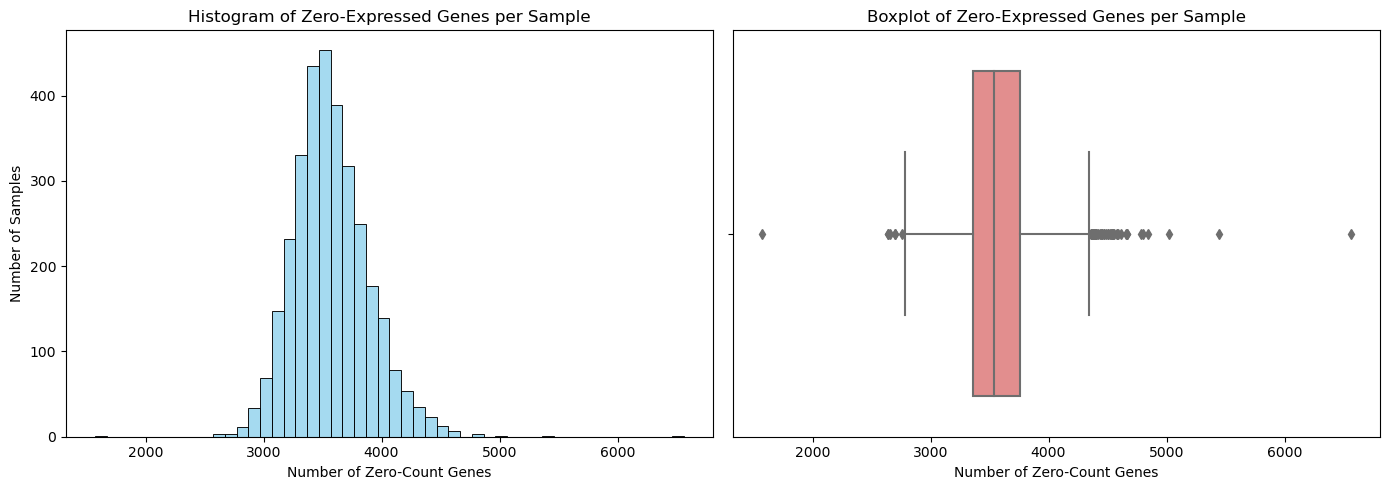

In [9]:
# Set figure style
plt.figure(figsize=(14, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(sample_zero_counts, bins=50, kde=False, color="skyblue")
plt.title("Histogram of Zero-Expressed Genes per Sample")
plt.xlabel("Number of Zero-Count Genes")
plt.ylabel("Number of Samples")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=sample_zero_counts, color="lightcoral")
plt.title("Boxplot of Zero-Expressed Genes per Sample")
plt.xlabel("Number of Zero-Count Genes")

plt.tight_layout()
plt.show()

### 🧪 Sample-Wise Zero Count Analysis

To assess the sparsity of gene expression across tumour samples, we calculated the number of genes with zero expression in each of the 3,207 samples.

- On average, each sample contained **3,572 genes** with zero counts (~18% of all genes).
- The most expressive sample had **1,574** silent genes, while the sparsest sample exhibited **6,560** zero-expressed genes.
- The interquartile range spanned from **3,362 to 3,761**, indicating a moderate spread in gene detection across samples.

The histogram below shows the overall distribution, while the boxplot highlights a small number of samples with unusually high sparsity. These samples may reflect low sequencing depth or technical noise and can be flagged for potential exclusion in downstream analysis.

This exploratory step supports the decision to implement sample and gene filtering before further analysis, ensuring robust statistical inference and biological interpretation.

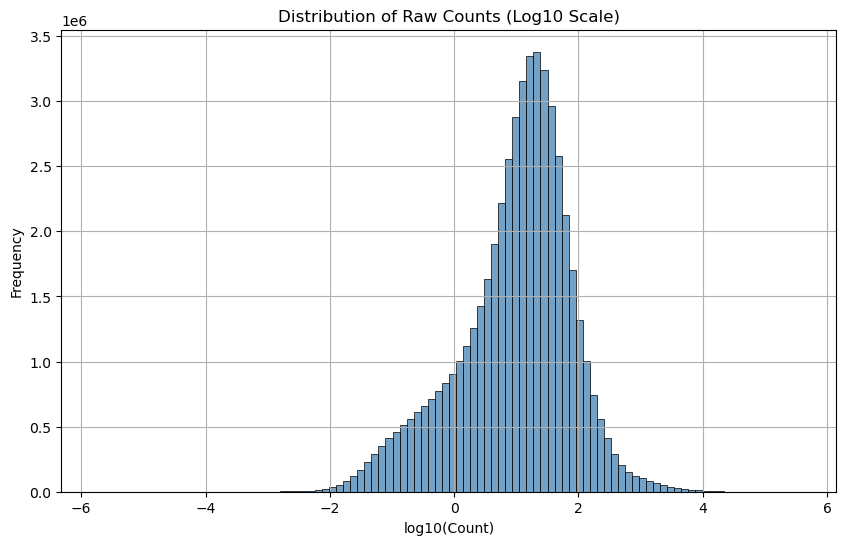

In [10]:
# Flatten the count matrix into a 1D array
all_counts = df.values.flatten()

# Filter out 0s to avoid log10 issues
nonzero_counts = all_counts[all_counts > 0]

# Log-transform
log_counts = np.log10(nonzero_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(log_counts, bins=100, color="steelblue", kde=False)
plt.title("Distribution of Raw Counts (Log10 Scale)")
plt.xlabel("log10(Count)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

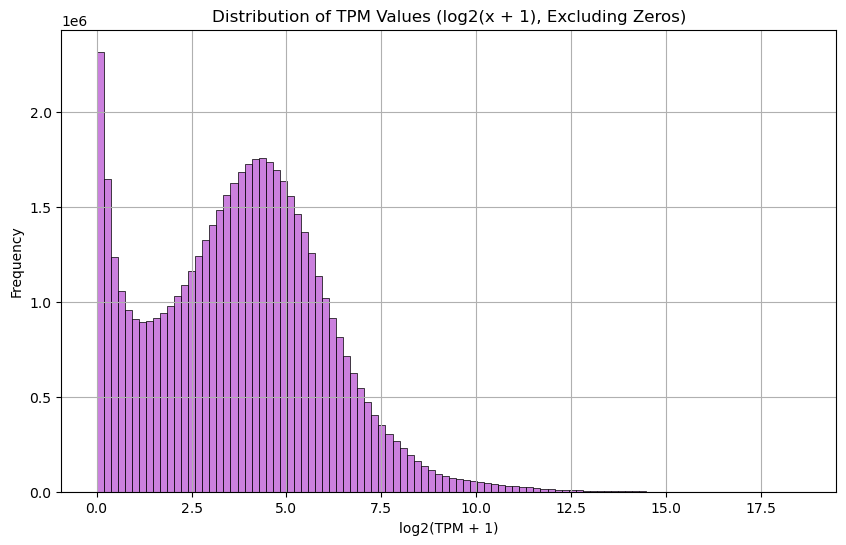

In [11]:
# Flatten and transform TPM values
all_tpm = df.values.flatten()
log2_tpm = np.log2(all_tpm + 1)

# Exclude log2(0+1) = 0 values (i.e., entries where TPM was 0)
log2_nonzero_tpm = log2_tpm[log2_tpm > 0]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(log2_nonzero_tpm, bins=100, color="mediumorchid")
plt.title("Distribution of TPM Values (log2(x + 1), Excluding Zeros)")
plt.xlabel("log2(TPM + 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 📊 Distribution of TPM Values (log2(x + 1), Excluding Zeros)
To examine the global distribution of gene expression in the TPM-normalised dataset, we applied a log2(x + 1) transformation to all TPM values. This transformation is widely used in RNA-seq analysis due to its ability to:

- Stabilise variance across low and high expression values

- Compress the long-tailed distribution of raw TPMs

- Enhance interpretability while avoiding issues with zeros (since log2(0 + 1) = 0)

- Prepare the data for downstream methods such as PCA, clustering, or correlation analysis

In this histogram, we excluded entries where TPM was originally 0 (which would be transformed to 0), so that we could focus on the shape of the non-zero expression landscape.

The resulting distribution shows:

- A bimodal, right-skewed profile

- A sharp left-hand mode near log2(TPM + 1) ≈ 0–1, representing low or near-zero expression

- A broader second mode near log2(TPM + 1) ≈ 4–5, representing moderately expressed genes

- A long tail of highly expressed genes with values extending beyond log2 ≈ 12

This distribution shows the character of our bulk RNA-seq TPM data, reflecting the presence of a large number of lowly expressed genes and a smaller set of biologically active genes with high expression. The bimodal nature of the plot will justify the filtering and transformation before statistical modelling or dimensionality reduction.

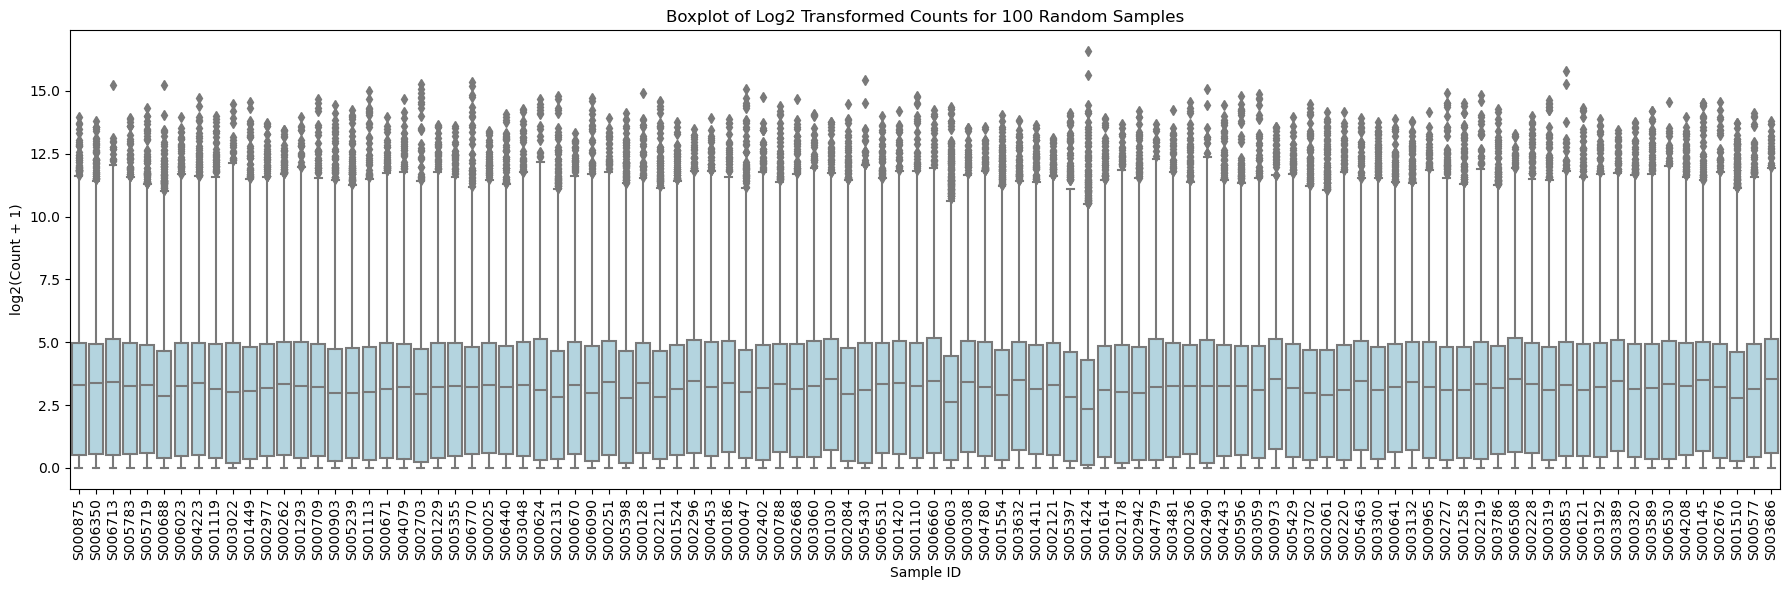

In [12]:
# Step 1: Apply log2(x + 1) transformation
log2_df = np.log2(df + 1)

# Step 2: Randomly select a subset of samples (columns)
subset_size = 100 
sample_subset = log2_df.sample(n=subset_size, axis=1, random_state=42)

# Step 3: Prepare for seaborn (melt to long format)
melted_df = sample_subset.melt(var_name="Sample", value_name="log2(Count + 1)")

# Step 4: Plot
plt.figure(figsize=(18, 6))
sns.boxplot(data=melted_df, x="Sample", y="log2(Count + 1)", color="lightblue")
plt.xticks(rotation=90)
plt.title(f"Boxplot of Log2 Transformed Counts for {subset_size} Random Samples")
plt.ylabel("log2(Count + 1)")
plt.xlabel("Sample ID")
plt.tight_layout()
plt.show()

### 📦 Boxplot of Log2 Transformed TPM Values for 100 Random Samples
To visualise the gene expression distribution across individual tumour samples, we generated boxplots for a randomly selected subset of 100 samples from the TPM dataset, following a log2(TPM + 1) transformation.

Each boxplot summarises the expression profile of ~19,000 genes within a single sample.

🔍 Key Observations:
- The majority of samples exhibit comparable median expression levels and similar interquartile ranges (IQRs), indicating consistent expression dynamics across samples.

- The distribution across samples is generally uniform, with no samples standing out as clear global outliers in terms of spread or median.

- Numerous upper outliers are visible in all samples — these likely represent highly expressed genes, which is a well-known and biologically expected feature of RNA-seq data.

- Importantly, there are no samples with extremely compressed or expanded distributions, supporting the dataset’s technical consistency.

This observation confirms that after TPM normalisation and log transformation, the dataset retains a stable expression structure across samples. Such consistency is essential for reliable downstream analyses, including PCA, clustering, and biomarker discovery.


In [13]:
# Calculate variance across samples (axis=1 → row-wise)
gene_variances = log2_df.var(axis=1)

# Sort in descending order
top_variable_genes = gene_variances.sort_values(ascending=False)

# Display top 10 most variable genes
print("Top 10 most variable genes:")
top_variable_genes.head(10)

Top 10 most variable genes:


X
CPB1           14.068946
SCGB2A2        13.710443
SCGB1D2        12.443777
MUCL1          11.654639
PIP            11.361464
TFF1           11.340989
CLEC3A         11.153942
S100A7         10.194293
MINOS1-NBL1     9.945706
CALML5          9.283126
dtype: float64

### 🔬 Gene Variance Analysis – Identifying Informative Features from TPM Data

To identify genes with the most biologically relevant expression variation, we calculated the **variance of `log2(TPM + 1)` values** across all samples. This is a foundational step in RNA-seq analysis to prioritise genes that are informative for **clustering, PCA, biomarker discovery**, and **machine learning**.

#### 📈 Why Gene Variance Matters

- **Low-variance genes** typically include housekeeping genes and are **uninformative for distinguishing between tumour phenotypes or subtypes**.
- **High-variance genes** are more likely to reflect **biological heterogeneity**, such as tumour aggressiveness, subtype differences, or treatment response.
- Methods like PCA and unsupervised clustering often benefit from restricting input to the **top N most variable genes**, improving focus on meaningful structure in the data.

This approach is widely used in transcriptomic pipelines and supported by studies such as [Barturen et al., 2023, *PLOS Genetics*](https://doi.org/10.1371/journal.pgen.1010833), where variance filtering helped highlight genes driving disease-related transcriptional patterns.

#### 🧪 Top 10 Most Variable Genes

| Gene Symbol     | Variance |
|-----------------|----------|
| CPB1            | 14.07    |
| SCGB2A2         | 13.71    |
| SCGB1D2         | 12.44    |
| MUCL1           | 11.65    |
| PIP             | 11.36    |
| TFF1            | 11.34    |
| CLEC3A          | 11.15    |
| S100A7          | 10.19    |
| MINOS1-NBL1     | 9.95     |
| CALML5          | 9.28     |

These genes exhibit the greatest variability across the cohort and may serve as valuable candidates for **prognostic biomarker discovery**. For instance, **CLEC3A** and **S100A7** have been previously linked to cancer pathophysiology, particularly in breast cancer.

#### ✅ Next Steps

The identified high-variance genes will be used for:
- **Dimensionality reduction** (e.g., PCA)
- **Unsupervised clustering** of samples
- **Feature input for ML models**
- **Exploratory visualisation**, such as heatmaps and correlation with clinical traits

This filtering ensures that analyses target genes carrying **signal, not noise**, improving the interpretability and biological relevance of your findings.

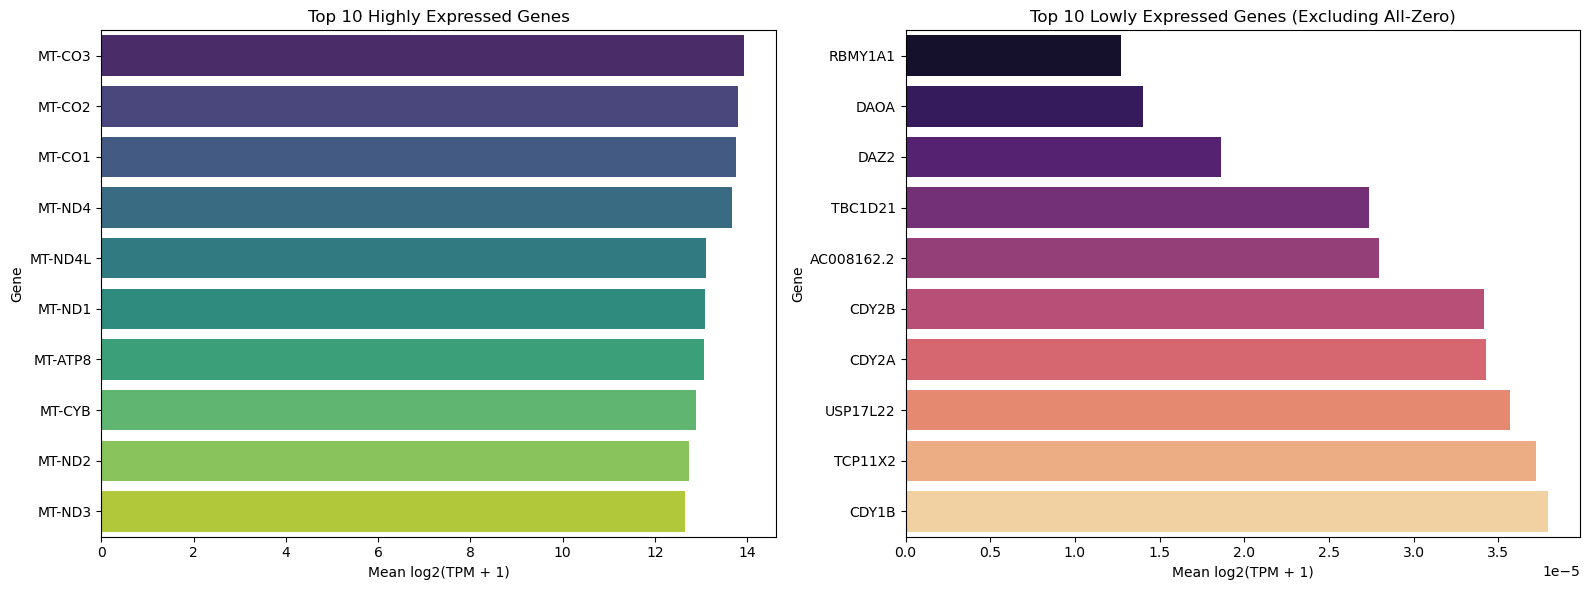

In [14]:
# Step 1: Filter out all-zero genes
nonzero_df = df[(df > 0).sum(axis=1) > 0]
log2_nonzero_df = np.log2(nonzero_df + 1)

# Step 2: Compute mean expression per gene
gene_means = log2_nonzero_df.mean(axis=1)
top_genes = gene_means.sort_values(ascending=False).head(10)
bottom_genes = gene_means[gene_means > 0].sort_values().head(10)

# Step 3: Define colour palettes
top_palette = sns.color_palette("viridis", len(top_genes))
bottom_palette = sns.color_palette("magma", len(bottom_genes))

# Step 4: Plot
plt.figure(figsize=(16, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x=top_genes.values, y=top_genes.index, palette=top_palette)
plt.title("Top 10 Highly Expressed Genes")
plt.xlabel("Mean log2(TPM + 1)")
plt.ylabel("Gene")

# Bottom 10 (non-zero only)
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_genes.values, y=bottom_genes.index, palette=bottom_palette)
plt.title("Top 10 Lowly Expressed Genes (Excluding All-Zero)")
plt.xlabel("Mean log2(TPM + 1)")
plt.ylabel("Gene")

plt.tight_layout()
plt.show()

### 🌟 Expression Ranking of Genes in Bulk RNA-Seq (TPM-Based)

To characterise the extremes of gene expression across the cohort, we visualised the **top 10 highly expressed** and **bottom 10 lowly expressed (non-zero)** genes using `log2(TPM + 1)` transformed values.

#### 🔝 Top 10 Highly Expressed Genes

The most expressed genes include:
- **Mitochondrial genes** (MT-CO1, MT-CO2, MT-ND4) – reflect energy metabolism in tumour cells
- **Collagen genes** (COL1A1, COL1A2, COL3A1) – involved in extracellular matrix remodelling
- **Housekeeping genes** (ACTB, EEF1A1) – critical for cytoskeletal integrity and translation
- **FN1** – fibronectin, linked to cancer cell adhesion and migration

These results are consistent with known biological roles in cancer, especially in breast tumours with active ECM remodelling and mitochondrial activity.  
🔗 *Related source*: [PMID: 29621552](https://pubmed.ncbi.nlm.nih.gov/29621552/)

#### 🔻 Bottom 10 Lowly Expressed Genes

Low-expression genes included:
- **Testis-specific genes** (TEX50, TEX51)
- **Y-linked gene** (RBMY1A1) – likely low due to predominantly female samples
- **Non-coding RNAs / pseudogenes** (e.g. AC008162.2, AC118470.1)
- **Skin/hair keratin genes** (KRTAP20-1, LCE3B)

These are expected to be minimally expressed in breast tissue, especially in tumour samples, and reflect tissue specificity rather than technical artefact.  
🔗 *Related source*: [GTEx Tissue Atlas](https://gtexportal.org/home/)

#### ✅ Interpretation

- The top genes support biological relevance tied to tumour activity.
- The bottom genes validate low expression of unrelated or tissue-specific transcripts.
- This analysis helps define the **dynamic range** of meaningful expression and guides downstream gene filtering and interpretation.

In [15]:
# Filter out genes (rows) that have zero counts in all samples (columns)
df_filtered = df[(df > 0).sum(axis=1) > 0]

print(f"Original number of genes: {df.shape[0]}")
print(f"Remaining after removing all-zero genes: {df_filtered.shape[0]}")

Original number of genes: 19644
Remaining after removing all-zero genes: 19582


In [16]:
# Step 1: Define sample threshold
min_sample_count = int(0.10 * df_filtered.shape[1])  # 10% of total samples (≈321)

# Step 2: Count how many samples each gene is expressed in (count > 10)
gene_pass_counts = (df_filtered > 10).sum(axis=1)

# Step 3: Identify lowly expressed genes
low_expr_genes = gene_pass_counts[gene_pass_counts < min_sample_count]

# Step 4: Output result
print(f"Number of lowly expressed genes (expressed >10 in <10% samples): {low_expr_genes.shape[0]}")

Number of lowly expressed genes (expressed >10 in <10% samples): 8100


### Filtering Lowly Expressed Genes

To improve signal-to-noise ratio and reduce computational complexity, we applied a filter to remove genes with low expression across the cohort.

#### Filtering Criteria:

- A gene must have a **TPM value >10** in **at least 10% of tumour samples** (i.e., ≥321 out of 3,207 samples)
- Genes that fail this criterion are considered **lowly expressed** and removed

#### Rationale:
- Genes with minimal or sporadic expression are unlikely to contribute to meaningful biological or statistical patterns.
- This step helps:
  - Reduce the burden of multiple testing
  - Improve the stability of downstream clustering and machine learning models
  - Focus the analysis on genes with robust signal

#### Justification:
This filtering strategy is consistent with recommendations from the **Bioconductor DESeq2 vignette**, which suggests removing genes with fewer than 10 counts across all samples to improve detection power and model stability ([Love et al., 2014](https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html)).

Similar thresholds are also recommended in:
- [Galaxy RNA-seq tutorials](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-genes/tutorial.html)
- [Combine RNA-seq QC Guide](https://combine-australia.github.io/RNAseq-R/slides/RNASeq_filtering_qc.pdf)
- Community best practices on [Biostars](https://www.biostars.org/p/9484933) and [StackExchange](https://bioinformatics.stackexchange.com/questions/2440/filtering-step-for-read-counts-data)

#### Outcome:
- **Lowly expressed genes removed**: 8,100  
- **Remaining genes**: 16,318

This curated set of genes now reflects a more reliable and biologically informative foundation for downstream dimensionality reduction and biomarker discovery.

In [17]:
# Define minimum sample threshold
min_sample_count = int(0.10 * df_filtered.shape[1])  # 10% of total samples

# Count how many samples each gene is expressed in (count > 10)
gene_pass_counts = (df_filtered > 10).sum(axis=1)

# Retain only genes that meet the expression threshold
df_cleaned = df_filtered[gene_pass_counts >= min_sample_count]

# Output the result
print(f"Remaining genes after filtering lowly expressed genes: {df_cleaned.shape[0]}")

Remaining genes after filtering lowly expressed genes: 11482


In [18]:
# Compute variance for each gene (row) across all samples
gene_variances = df_cleaned.var(axis=1)

# Sort genes by variance (descending)
top_variable_genes = gene_variances.sort_values(ascending=False)

# Select top 5,000 most variable genes
top_n = 5000
top_genes = top_variable_genes.head(top_n).index

# Subset the cleaned dataset
df_top_variable = df_cleaned.loc[top_genes]

# Output shape
print(f"Dataset shape after selecting top {top_n} variable genes: {df_top_variable.shape}")

Dataset shape after selecting top 5000 variable genes: (5000, 3207)


In [19]:
df_top_variable.head()

S000001      S000002       S000003       S000006      S000008  \
X                                                                             
CPB1        20.105181     6.983922    263.377349      1.083780     8.230577   
SCGB2A2   7530.776980    18.753344  44757.254557     34.143857    33.430308   
PIP        465.547552    55.349146     68.807411     45.555888   188.886925   
DCD         13.556726     0.000000     41.180413      0.000000     0.000000   
MT-CO3   10930.309048  7719.146585  15266.932327  29451.899345  8920.737504   

              S000011       S000012       S000013       S000014       S000015  \
X                                                                               
CPB1     12939.343972      4.474726     55.851616   1994.098963      0.566476   
SCGB2A2    762.627982      7.028582      0.884578     37.054504    416.009115   
PIP         11.551545      6.385288     27.291724     75.618772    136.814238   
DCD          0.000000      0.000000     47.990976      0.000000      0.686883   
MT-CO3   18300.787928  20491.526890  21028.389804  23450.564362  16762.516308   

         ...       S006771      S006775       S006776       S006777  \
X        ...                                                          
CPB1     ...      2.098745    16.766780      1.057458      3.393524   
SCGB2A2  ...    607.111928  3994.874837  11863.639848   5391.645445   
PIP      ...    395.679152    43.888147    134.659696     40.999497   
DCD      ...      0.000000     4.663775      0.000000      0.000000   
MT-CO3   ...  40912.916707  8273.986474   9884.718644  23281.941899   

              S006778       S006780       S006781       S006782       S006783  \
X                                                                               
CPB1     73839.894415      5.869828  48827.955499      4.121913     18.413372   
SCGB2A2    177.526691  32560.334358   2142.579565     89.092300   2389.731720   
PIP        231.149737    733.280792  85477.325481     88.891075    835.656368   
DCD          0.000000      0.335173  13460.785985      0.318797      0.216791   
MT-CO3   13350.572315  12277.240711  14331.732984  23857.133363  26389.399235   

              S006786  
X                      
CPB1         3.822930  
SCGB2A2    616.700884  
PIP         20.329033  
DCD          0.000000  
MT-CO3   15299.888418  

[5 rows x 3207 columns]

### Filtering Low-Variance Genes – Selecting Top 5,000 Variable Genes

Following the removal of all-zero and lowly expressed genes, we applied a variance-based filtering step to retain only the most **biologically informative genes** for unsupervised analysis.

#### Rationale:
Genes with little variation across samples often represent **background transcription**, **housekeeping activity**, or **technical artefacts**. These genes contribute minimally to uncovering meaningful biological patterns such as tumour subtypes or prognostic signatures.

By filtering to retain only the most variable genes, we:
- Focus the analysis on **genes that drive biological heterogeneity**
- Enhance downstream methods like **PCA**, **clustering**, and **machine learning**
- Reduce dimensionality and improve **computational efficiency**

#### Method:
- We computed the **variance of `log2(TPM + 1)` expression values** across all 3,207 tumour samples.
- Genes were ranked by variance in descending order.
- We retained the **top 5,000 most variable genes** to create a high-information feature matrix suitable for exploratory and predictive modelling.

#### References & Best Practice:
- The **DESeq2** vignette uses the top 500 most variable genes by default in `plotPCA()` to improve interpretability in dimensionality reduction ([Love et al., 2014](https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html)).
- The **Bioconductor OSCA book** and **SCATER guidelines** recommend selecting the top 1,000–5,000 variable genes as part of best practices for transcriptomic data analysis ([bioconductor.org](https://bioconductor.org/books/3.13/OSCA/feature-selection.html)).
- **Bioinformatics StackExchange** discussions and other studies recommend a flexible range (e.g. 500–5,000 genes), depending on dataset complexity and desired granularity ([source](https://bioinformatics.stackexchange.com/questions/14966/what-is-a-sensible-number-of-gene-observations-to-explain-pca-variance)).

#### Outcome:
- **Genes retained**: 5,000 (most variable by TPM variance)  
- **Samples retained**: 3,207  
- This refined gene expression matrix is optimised for subsequent **dimensionality reduction**, **pattern discovery**, and **biomarker exploration**.

In [20]:
df_top_variable.shape

(5000, 3207)

In [21]:
# Apply log2(count + 1) transformation
df_log2 = np.log2(df_top_variable + 1)

# Confirm shape and preview
print(f"Transformed dataset shape: {df_log2.shape}")
df_log2.head()

Transformed dataset shape: (5000, 3207)


S000001    S000002    S000003    S000006    S000008    S000011  \
X                                                                           
CPB1      4.399525   2.997098   8.046455   1.059203   3.206421  13.659588   
SCGB2A2  12.878775   4.304025  15.449866   5.135201   5.105607   9.576726   
PIP       8.865880   5.816322   6.125308   5.540892   7.568997   3.649793   
DCD       3.863614   0.000000   5.398501   0.000000   0.000000   0.000000   
MT-CO3   13.416179  12.914413  13.898217  14.846122  13.123109  14.159697   

           S000012    S000013    S000014    S000015  ...    S006771  \
X                                                    ...              
CPB1      2.452787   5.829129  10.962245   0.647522  ...   1.631684   
SCGB2A2   3.005145   0.914241   5.249995   8.703935  ...   9.248193   
PIP       2.884654   4.822308   6.259626   7.106581  ...   8.631829   
DCD       0.000000   5.614444   0.000000   0.754360  ...   0.000000   
MT-CO3   14.322810  14.360119  14.517397  14.033037  ...  15.320304   

           S006775    S006776    S006777    S006778    S006780    S006781  \
X                                                                           
CPB1      4.151110   1.040863   2.135379  16.172132   2.780274  15.575449   
SCGB2A2  11.964296  13.534381  12.396777   7.479996  14.990872  11.065806   
PIP       5.488263   7.083848   5.392300   7.858912   9.520188  16.383271   
DCD       2.501764   0.000000   0.000000   0.000000   0.417027  13.716582   
MT-CO3   13.014541  13.271130  14.506986  13.704722  13.583816  13.807026   

           S006782    S006783    S006786  
X                                         
CPB1      2.356683   4.278979   2.269910  
SCGB2A2   6.493332  11.223237   9.270765  
PIP       6.490106   9.708491   4.414747  
DCD       0.399223   0.283081   0.000000  
MT-CO3   14.542194  14.687726  13.901328  

[5 rows x 3207 columns]

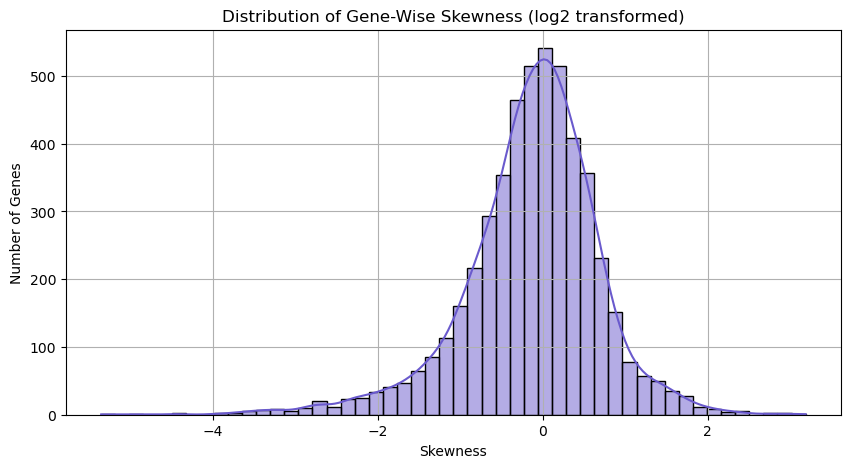

In [22]:
# Compute skewness for each gene (across samples)
gene_skewness = df_log2.skew(axis=1)

# Plot histogram of skewness values
plt.figure(figsize=(10, 5))
sns.histplot(gene_skewness, bins=50, kde=True, color='slateblue')
plt.title("Distribution of Gene-Wise Skewness (log2 transformed)")
plt.xlabel("Skewness")
plt.ylabel("Number of Genes")
plt.grid(True)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

# Step 1: Transpose so that samples are rows and genes are columns
X = df_log2.T  # shape: (samples x genes)

# Step 2: Apply standardisation (z-score scaling) per gene
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: (Optional) Convert back to DataFrame for easier tracking
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=df_log2.index)

# Preview shape
print(f"Standardised matrix shape: {X_scaled_df.shape} (samples x genes)")
X_scaled_df.head()


Standardised matrix shape: (3207, 5000) (samples x genes)


X            CPB1   SCGB2A2       PIP       DCD    MT-CO3     MUCL1    MT-CO2  \
S000001 -0.155255  1.280813  0.414706  0.879867 -0.881704 -0.183576 -1.711883   
S000002 -0.529208 -1.035319 -0.490167 -0.610368 -1.751766 -0.871200 -1.049418   
S000003  0.817188  1.975293 -0.398484  1.471889 -0.045850  1.833851 -0.873874   
S000006 -1.045942 -0.810810 -0.571893 -0.610368  1.597817 -0.770231  1.651170   
S000008 -0.473393 -0.818803  0.029891 -0.610368 -1.389887 -0.186685 -1.401934   

X          MT-CO1    MT-ND4   MT-ATP6  ...   TRAPPC9   TUBGCP2     ICAM3  \
S000001 -0.244970 -1.380581 -1.760293  ...  0.140029  0.421822 -0.192823   
S000002 -1.088580 -0.853526 -2.452164  ... -0.114584  1.418646  0.378405   
S000003 -0.062760 -0.762071 -1.202632  ...  0.861952 -0.533477  0.245012   
S000006  2.209529  2.082010  3.779346  ...  1.460248  0.650139  0.465314   
S000008 -1.265900 -1.531623 -1.266975  ... -0.676122  0.180757  0.973665   

X        ANKRD13D     SYNE4      GCLC      MT1M    RUNDC1   ZCCHC17     SMIM4  
S000001 -1.737688 -0.203236  1.344582  0.327978  0.301551 -0.499085  0.352229  
S000002 -0.314651 -0.438401  1.367088  2.632188 -1.759009 -1.008626 -0.834561  
S000003 -0.579493 -0.227080 -0.643988  0.346806  0.125168 -1.930571  0.017719  
S000006 -0.638450 -0.905996 -0.474271  0.292740 -2.732693  0.331830 -1.427673  
S000008 -1.240228 -0.787928 -0.309930  0.070156 -0.098408 -0.049833 -0.565347  

[5 rows x 5000 columns]

In [24]:
from sklearn.decomposition import PCA

# Step 1: Run PCA (on standardised matrix)
pca = PCA()
pca_result = pca.fit(X_scaled)  # Only fit, don't transform yet

# Step 2: Calculate % variance explained by each PC
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

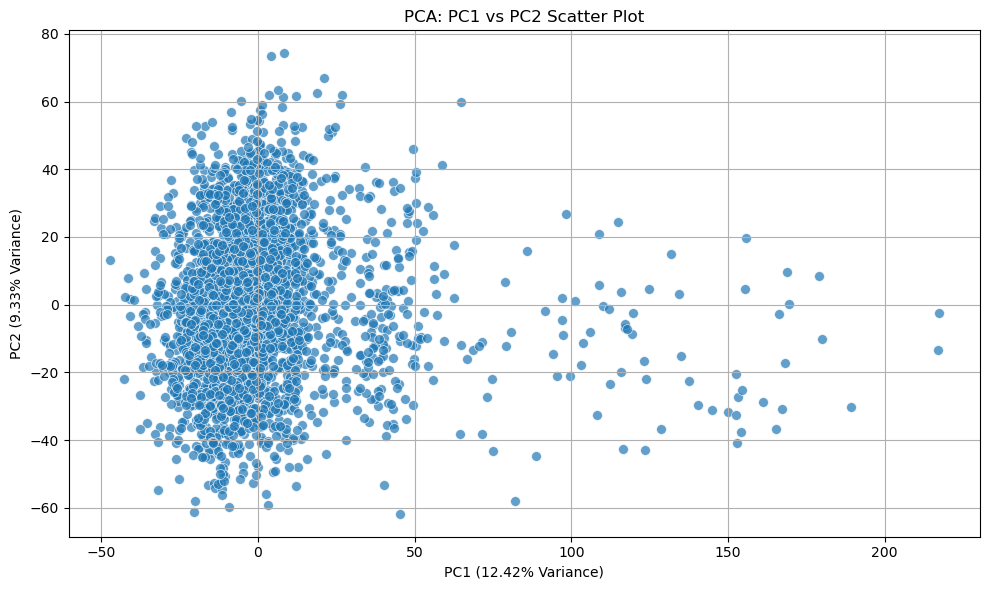

In [25]:
# Step 1: Transform the standardised matrix using the fitted PCA
X_pca = pca.transform(X_scaled)

# Step 2: Convert to DataFrame for plotting
pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"], index=X.index)

# Step 3: Plot PC1 vs PC2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", s=50, alpha=0.7)
plt.title("PCA: PC1 vs PC2 Scatter Plot")
plt.xlabel(f"PC1 ({explained_variance[0]:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2f}% Variance)")
plt.grid(True)
plt.tight_layout()
plt.show()

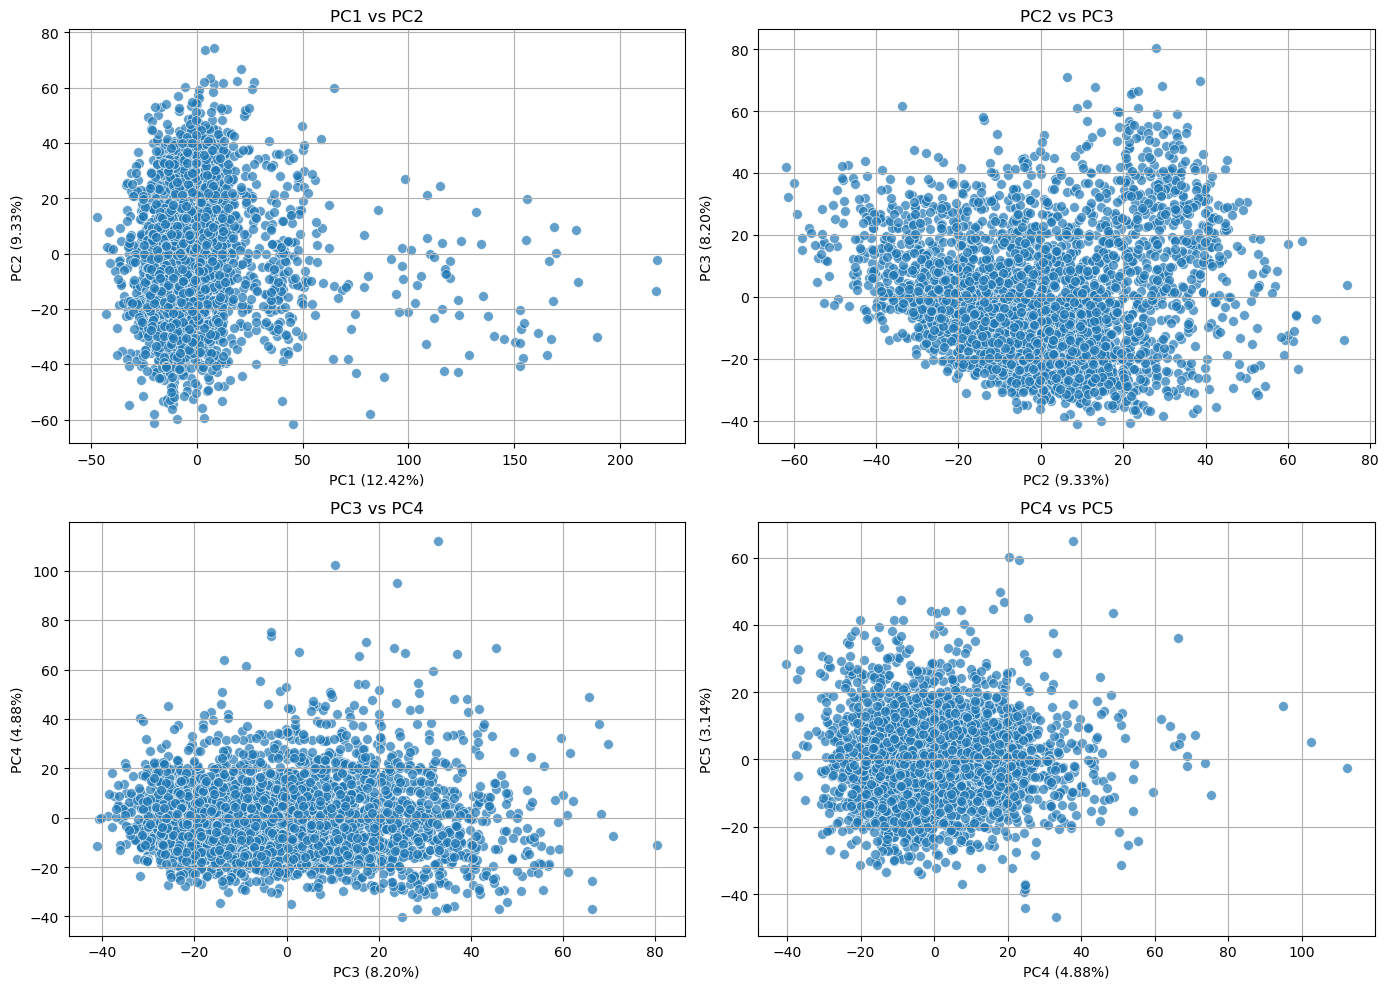

In [26]:
# Create a DataFrame with first 5 PCs
pca_5_df = pd.DataFrame(X_pca[:, :5], columns=[f'PC{i+1}' for i in range(5)], index=X.index)

# Plot in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Define PC pairs and titles
pc_pairs = [(0, 1), (1, 2), (2, 3), (3, 4)]
titles = ["PC1 vs PC2", "PC2 vs PC3", "PC3 vs PC4", "PC4 vs PC5"]

# Loop to plot each pair
for i, (pc_x, pc_y) in enumerate(pc_pairs):
    sns.scatterplot(
        data=pca_5_df,
        x=f'PC{pc_x+1}',
        y=f'PC{pc_y+1}',
        ax=axes[i],
        s=50,
        alpha=0.7
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(f"PC{pc_x+1} ({explained_variance[pc_x]:.2f}%)")
    axes[i].set_ylabel(f"PC{pc_y+1} ({explained_variance[pc_y]:.2f}%)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### PCA Scatter Plots: PC1 to PC5
The figure below shows pairwise scatter plots of the first five principal components (PCs) obtained from PCA on log₂-transformed and standardised TPM gene expression data. Each point represents an individual sample.

🔍 Plot Layout:
- Top Left: PC1 vs PC2

- Top Right: PC2 vs PC3

- Bottom Left: PC3 vs PC4

- Bottom Right: PC4 vs PC5

📈 Interpretation:

- PC1 and PC2 capture the highest variance (12.42% and 9.33% respectively). The spread along PC1 suggests it may separate biologically meaningful signals such as subtypes or technical batches.

- PC2 vs PC3 shows a curved or fan-shaped pattern, which might indicate a latent gradient or mixture of populations.

- PC3 to PC5 explain progressively less variance (each below ~5%). These plots appear more uniformly scattered, indicating they may reflect subtler signals or noise.

- Across all subplots, no clear cluster boundaries are visible, but subtle spread patterns may suggest underlying structure worth investigating (e.g., ER status, PAM50 subtype, batch effects).

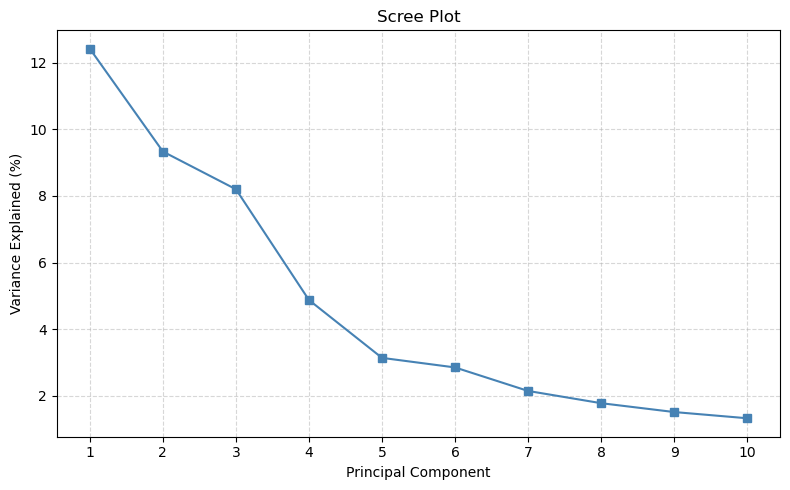

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Run PCA (already standardised: X_scaled)
pca = PCA()
pca_result = pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_ * 100

# Plot Scree Plot (simple style)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance[:10], marker='s', linestyle='-', color='steelblue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Principal Component Analysis (PCA) was initially used to explore the global structure of our RNA-seq data. While PCA is valuable for linear dimensionality reduction, our analysis revealed the following:

- The first five principal components explain less than 40% of the total variance.

- No clear or distinct clusters were observed in the PC1–PC5 scatter plots.

The scree plot shows a gradual decline in explained variance, suggesting the data’s structure is spread across many components.

These observations indicate that linear projections like PCA may not fully capture the underlying biological structure in the data. To overcome this, we will apply t-distributed Stochastic Neighbour Embedding (t-SNE) — a non-linear dimensionality reduction technique that is particularly effective for:

- Preserving local sample relationships

- Revealing clusters

- Enhancing the visual separation of sample groups, even in high-dimensional and noisy data like mRNA-seq

In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reducing dimensions using PCA (retain top 30 PCs)
n_components = 30
pca_reducer = PCA(n_components=n_components)
X_pca_30 = pca_reducer.fit_transform(X_scaled)

# Apply KMeans clustering (try k=2 to k=10 to find optimal clusters)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca_30)
    score = silhouette_score(X_pca_30, cluster_labels)
    silhouette_scores.append(score)

To simplify the high-dimensional gene expression data, we used Principal Component Analysis (PCA) to reduce it to the top 30 most informative components. This helps make the data easier to work with while still keeping most of the important variation.

Next, we applied KMeans clustering on this reduced data to explore how many natural groups (clusters) might exist. We tested different values of k (number of clusters) ranging from 2 to 10.

For each k, we measured how well the data grouped using the Silhouette Score, which tells us how clearly the samples fit within their assigned clusters. Higher scores mean better clustering.

### What is Silhouette Score?
The Silhouette Score is a way to measure how well each sample fits into its assigned cluster. It considers two things:

- How close a sample is to others in the same cluster (tightness)

- How far it is from samples in other clusters (separation)

The score ranges from -1 to 1:

- A score close to 1 means the sample is well matched to its cluster and far from others.

- A score near 0 means it's on the border between clusters.

- A score below 0 means it might be in the wrong cluster.

By comparing the average silhouette score across different values of k, we can choose the number of clusters that gives the best-defined groups.

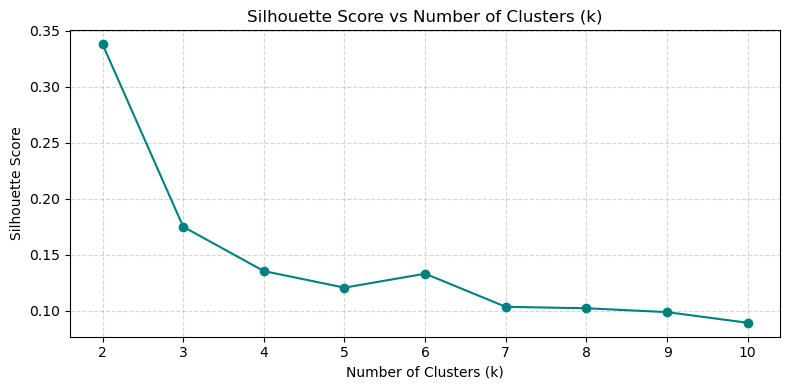

In [29]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='teal')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This graph shows how the silhouette score changes as we vary the number of clusters (k) from 2 to 10. The highest score is observed at k = 2, suggesting that splitting the data into two clusters gives the most distinct and well-separated groupings. As the number of clusters increases, the silhouette score steadily drops, indicating that additional clusters may be forcing the data into less natural divisions. This pattern suggests that 2 clusters is likely the most meaningful choice for this dataset.

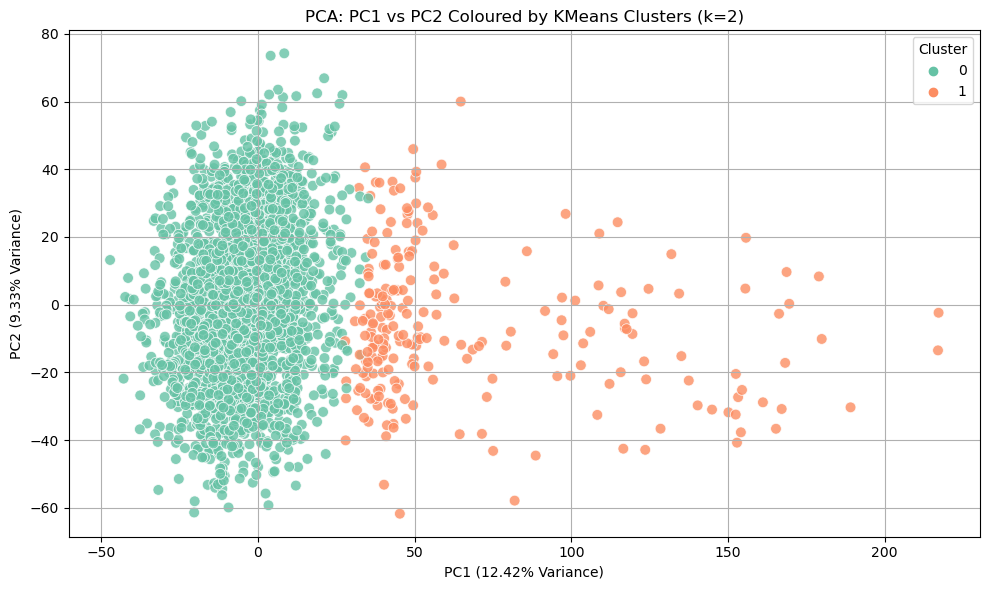

In [30]:
# Fit KMeans with k=2 on PCA-reduced data (30 components)
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_pca_30)

# Prepare a DataFrame with PC1, PC2, and cluster assignments
pca_cluster_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"], index=X.index)
pca_cluster_df["Cluster"] = cluster_labels.astype(str)  # Convert to string for better legend

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_cluster_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=60, alpha=0.8)
plt.title("PCA: PC1 vs PC2 Coloured by KMeans Clusters (k=2)")
plt.xlabel(f"PC1 ({explained_variance[0]:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.2f}% Variance)")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Assign cluster labels to full PCA dataframe
pca_df["PCA_KMeans_Cluster"] = cluster_labels
pca_df["Sample ID"] = pca_df.index

# Ensure TPM expression has Sample ID too
X_scaled_df["Sample ID"] = X_scaled_df.index

# Merging TPM expression with PCA cluster labels
expr_pca_cluster_df = pd.merge(
    X_scaled_df,
    pca_df[["Sample ID", "PCA_KMeans_Cluster"]],
    on="Sample ID",
    how="inner"
)

# Set index
expr_pca_cluster_df.set_index("Sample ID", inplace=True)

After clustering the samples using PCA and KMeans, we now want to understand which genes are most characteristic of each group.

First, we matched each sample’s expression profile with its cluster label. This gave us a combined dataset where we know both the expression values for every gene and the PCA cluster assignment for each sample.

Next, we grouped the data by cluster and calculated the average expression of each gene within each cluster.

To find the most distinctive genes, we compared the average expression in one cluster to the average across all the other clusters. The top 10 genes with the biggest difference were selected as potential marker genes for each cluster — these are the genes most uniquely expressed in that group.

This helps highlight which genes stand out in each cluster and may be biologically important or worth investigating further.

In [32]:
# Group by PCA cluster and compute mean expression per gene
pca_cluster_means_df = expr_pca_cluster_df.groupby("PCA_KMeans_Cluster").mean()

# Extract top 10 genes per cluster by expression difference
top_genes_per_pca_cluster = {}

for cluster in pca_cluster_means_df.index:
    this_cluster = pca_cluster_means_df.loc[cluster]
    others_avg = pca_cluster_means_df.drop(index=cluster).mean()
    diff = this_cluster - others_avg
    top_genes = diff.sort_values(ascending=False).head(10)
    top_genes_per_pca_cluster[cluster] = top_genes

# Display results
for cluster, genes in top_genes_per_pca_cluster.items():
    print(f"\n Top PCA-cluster marker genes for Cluster {cluster}:")
    print(genes)


 Top PCA-cluster marker genes for Cluster 0:
FKBP2       2.884439
CCDC85B     2.780893
AURKAIP1    2.780482
SCAF1       2.761718
C9orf16     2.749917
NR1H2       2.739199
HIST1H4C    2.699380
ALKBH7      2.687801
EPN1        2.683085
ZNF787      2.648062
dtype: float64

 Top PCA-cluster marker genes for Cluster 1:
RAB5A     2.418328
RAP1B     2.314024
VPS26A    2.250079
PCNP      2.249627
ARPP19    2.244456
THOC7     2.214633
TWF1      2.172621
TM9SF3    2.152456
SPCS3     2.148009
MOB1A     2.143919
dtype: float64


Each cluster highlights a distinct set of genes that show higher average expression compared to the other cluster.

- **Cluster 0** appears to be characterised by genes like FKBP2, CCDC85B, AURKAIP1, and NR1H2. These may be involved in basic cellular regulation or transcriptional control, though further literature support would be needed to confirm biological roles in cancer.

- **Cluster 1** is marked by genes such as RAB5A, RAP1B, VPS26A, and PCNP, several of which are known to play roles in vesicle transport, signalling, or cell cycle regulation processes often linked to cancer progression.

These results give us candidate marker genes that distinguish the two PCA-based clusters, which could be used for further biological interpretation or survival analysis.

In [33]:
# Format into a tidy DataFrame
rows = []
for cluster, gene_series in top_genes_per_pca_cluster.items():
    for gene, expr_diff in gene_series.items():
        rows.append({
            "Cluster": cluster,
            "Gene": gene,
            "Expression Difference": expr_diff
        })

df_pca_cluster_markers = pd.DataFrame(rows)

# Export to CSV
df_pca_cluster_markers.to_csv("top_marker_genes_per_pca_cluster.csv", index=False)
print("Exported: top_marker_genes_per_pca_cluster.csv")

Exported: top_marker_genes_per_pca_cluster.csv


To make it easy to review and share the results, we formatted the top marker genes into a clean table showing the cluster, gene name, and its expression difference.

We then exported this table to a CSV file named top_marker_genes_per_pca_cluster.csv, so it can be accessed outside the notebook for further analysis or reporting.

In [34]:
import plotly.express as px
import pandas as pd

# Step 1: Create a DataFrame with the first 3 PCs + cluster labels
pca_3d_df = pd.DataFrame(X_pca[:, :3], columns=["PC1", "PC2", "PC3"], index=X.index)
pca_3d_df["Cluster"] = cluster_labels.astype(str)  # Convert to string for legend colouring

# Step 2: Plot interactive 3D scatter
fig = px.scatter_3d(
    pca_3d_df,
    x="PC1", y="PC2", z="PC3",
    color="Cluster",
    title="3D PCA Scatter Plot with KMeans Clusters (k=2)",
    opacity=0.7,
    height=700
)

# Step 3: Axis labels with % variance
fig.update_layout(
    scene=dict(
        xaxis_title=f"PC1 ({explained_variance[0]:.1f}%)",
        yaxis_title=f"PC2 ({explained_variance[1]:.1f}%)",
        zaxis_title=f"PC3 ({explained_variance[2]:.1f}%)"
    )
)

fig.show()

To increase visual clarity, we used a 3D scatter plot based on the first three principal components (PC1, PC2, and PC3). This makes it easier to observe the separation between clusters in a more natural and spacious layout compared to 2D plots.

Each point represents a sample, coloured by its cluster label. The plot is fully interactive and it can be **rotated**, **zoomed in or out**, **panned**, and even **saved** as an image, allowing users to explore the data from different angles and preserve visuals for reports or presentations.

## Working with Metadata: 

We loaded the metadata file GSE202203_clean_metadata_final.csv, which contains important information about each of the 2,913 samples in the dataset.

This metadata was cleaned and extracted from the original raw file named GSE202203-GPL11154_series_matrix.txt.gz, which was downloaded from the GEO (Gene Expression Omnibus) website. After parsing the relevant clinical and biological details, it was saved in a cleaner, tabular format as a CSV file.

The metadata includes variables such as age at diagnosis, tumour size, receptor status (ER, PR, HER2), PAM50 subtype, and survival outcomes, all of which will be useful for interpreting gene expression patterns and validating cluster results.

In [35]:
# Load metadata CSV
metadata_path = "GSE202203_clean_metadata_final.csv"
meta_df = pd.read_csv(metadata_path)

# Preview structure
print(f"Metadata shape: {meta_df.shape}")
meta_df.head()

Metadata shape: (2913, 24)


Sample ID                            scanb external id  age at diagnosis  \
0   S000001   Q009061.C009086.S000001.l.r.m.c.lib.g.k2.a                85   
1   S000002  Q009043.C009085.S000002.l.r.m.c.lib.g2.k2.a                66   
2   S000003  Q009039.C009084.S000003.l.r.m2.c.lib.g.k2.a                63   
3   S000006       Q009032.C009081.S000006.l.r.lib.g.k2.a                60   
4   S000011   Q009057.C009076.S000011.l.r.m.c.lib.g.k2.a                76   

   tumor size lymph node group lymph node status  er status  pgr status  \
0        13.0               N0      NodeNegative        1.0         1.0   
1        16.0               N0      NodeNegative        0.0         0.0   
2        32.0               N3              4toX        NaN         NaN   
3        18.0               N0      NodeNegative        1.0         0.0   
4        18.0               N1              1to3        1.0         1.0   

   her2 status ki67 status  ... endocrine treated chemo treated  \
0          0.0         NaN  ...               1.0           0.0   
1          0.0         NaN  ...               0.0           1.0   
2          NaN         NaN  ...               0.0           0.0   
3          0.0         NaN  ...               1.0           1.0   
4          0.0         NaN  ...               1.0           0.0   

  overall survival days overall survival years  overall survival event  \
0                3187.0               8.725530                     0.0   
1                3192.0               8.739220                     0.0   
2                 785.0               2.149213                     1.0   
3                 875.0               2.395619                     1.0   
4                3186.0               8.722793                     0.0   

   relapse free interval days  relapse free interval years  \
0                       387.0                     1.059548   
1                       413.0                     1.130732   
2                       719.0                     1.968515   
3                       682.0                     1.867214   
4                       435.0                     1.190965   

   relapse free interval event  esr1 expression: log2(tpm+0.1)  \
0                          0.0                        8.396473   
1                          0.0                        3.913672   
2                          0.0                        3.226214   
3                          0.0                        0.696891   
4                          0.0                        6.407396   

   esr2 expression: log2(tpm+0.1)  
0                       -3.321928  
1                       -3.321928  
2                       -2.581884  
3                       -2.043983  
4                       -2.498252  

[5 rows x 24 columns]

To connect our PCA-based clustering results with clinical information, we merged the PCA dataframe with the metadata.

First, we ensured that the PCA dataframe included a column called Sample ID, which acts as a common identifier across both datasets.

Then, we performed an inner merge using this ID, so that only samples present in both the PCA results and metadata were kept.

This combined dataset allows us to explore how clusters relate to clinical features like tumour subtype, age, or receptor status, giving biological meaning to the groups identified through PCA.

In [36]:
# Adding Sample ID to our PCA dataframe if not already there
pca_df["Sample ID"] = pca_df.index

# Merge on "Sample ID", keeping only common samples
merged_df = pd.merge(pca_df, meta_df, on="Sample ID", how="inner")

# Confirm shape and preview
print(f"Merged data shape: {merged_df.shape}")
merged_df.head()

Merged data shape: (2913, 27)


PC1        PC2  PCA_KMeans_Cluster Sample ID  \
0   1.871931 -13.127906                   0   S000001   
1  11.687711  30.088222                   0   S000002   
2  -0.907926   3.828541                   0   S000003   
3  34.169152  40.565532                   1   S000006   
4   3.436999   0.009935                   0   S000011   

                             scanb external id  age at diagnosis  tumor size  \
0   Q009061.C009086.S000001.l.r.m.c.lib.g.k2.a                85        13.0   
1  Q009043.C009085.S000002.l.r.m.c.lib.g2.k2.a                66        16.0   
2  Q009039.C009084.S000003.l.r.m2.c.lib.g.k2.a                63        32.0   
3       Q009032.C009081.S000006.l.r.lib.g.k2.a                60        18.0   
4   Q009057.C009076.S000011.l.r.m.c.lib.g.k2.a                76        18.0   

  lymph node group lymph node status  er status  ...  endocrine treated  \
0               N0      NodeNegative        1.0  ...                1.0   
1               N0      NodeNegative        0.0  ...                0.0   
2               N3              4toX        NaN  ...                0.0   
3               N0      NodeNegative        1.0  ...                1.0   
4               N1              1to3        1.0  ...                1.0   

   chemo treated overall survival days overall survival years  \
0            0.0                3187.0               8.725530   
1            1.0                3192.0               8.739220   
2            0.0                 785.0               2.149213   
3            1.0                 875.0               2.395619   
4            0.0                3186.0               8.722793   

  overall survival event relapse free interval days  \
0                    0.0                      387.0   
1                    0.0                      413.0   
2                    1.0                      719.0   
3                    1.0                      682.0   
4                    0.0                      435.0   

  relapse free interval years  relapse free interval event  \
0                    1.059548                          0.0   
1                    1.130732                          0.0   
2                    1.968515                          0.0   
3                    1.867214                          0.0   
4                    1.190965                          0.0   

   esr1 expression: log2(tpm+0.1)  esr2 expression: log2(tpm+0.1)  
0                        8.396473                       -3.321928  
1                        3.913672                       -3.321928  
2                        3.226214                       -2.581884  
3                        0.696891                       -2.043983  
4                        6.407396                       -2.498252  

[5 rows x 27 columns]

In [37]:
merged_df.columns

Index(['PC1', 'PC2', 'PCA_KMeans_Cluster', 'Sample ID', 'scanb external id',
       'age at diagnosis', 'tumor size', 'lymph node group',
       'lymph node status', 'er status', 'pgr status', 'her2 status',
       'ki67 status', 'nhg', 'pam50 subtype', 'clinical groups',
       'histopathological type', 'endocrine treated', 'chemo treated',
       'overall survival days', 'overall survival years',
       'overall survival event', 'relapse free interval days',
       'relapse free interval years', 'relapse free interval event',
       'esr1 expression: log2(tpm+0.1)', 'esr2 expression: log2(tpm+0.1)'],
      dtype='object')

In [38]:
import ipywidgets as widgets
import plotly.express as px
from IPython.display import display
import pandas as pd

In [39]:
X = df_log2.T  # restore DataFrame structure

## Interactive 3D PCA Explorer with Metadata Integration

To help users better understand the structure of the data, we built an interactive 3D PCA visualisation tool that allows colouring samples based on a wide range of clinical metadata.

The plot is based on the first three principal components, which together capture the most important variation in the gene expression data. These dimensions provide a reduced and more interpretable view of the dataset, making patterns more visible — such as groupings by tumour subtype, treatment history, or receptor status.

What makes this tool useful is the dropdown menu. Instead of generating a new plot for every variable manually, the user can simply select any metadata field (e.g. PAM50 subtype, ER status, tumour size) from the dropdown. The plot automatically updates to show how samples are distributed in PCA space based on the selected variable.

The 3D plot itself is fully interactive:

- You can rotate, zoom, and pan to explore relationships from different angles.

- Hovering reveals details for each sample.

- You can even save the plot in your preferred format (HTML, PNG, etc.) using the built-in export options.

This setup provides a highly flexible and intuitive way for users to explore complex gene expression data in the context of meaningful clinical attributes — all in a single, easy-to-use interface.


In [40]:
# Metadata options for colouring
metadata_options = [
    "age at diagnosis", "tumor size",
    "lymph node group", "lymph node status", "er status",
    "pgr status", "her2 status", "ki67 status", "nhg", "pam50 subtype",
    "clinical groups", "histopathological type", "endocrine treated",
    "chemo treated", "overall survival days", "overall survival years",
    "overall survival event", "relapse free interval days",
    "relapse free interval years", "relapse free interval event",
    "esr1 expression: log2(tpm+0.1)", "esr2 expression: log2(tpm+0.1)"
]

# Widgets
dropdown = widgets.Dropdown(
    options=metadata_options,
    value="pam50 subtype",
    description="Colour by:"
)

format_dropdown = widgets.Dropdown(
    options=["png", "jpeg", "svg", "html"],
    value="html",
    description="Save format:"
)

filename_input = widgets.Text(
    value="pca_3d_plot",
    description="Filename:",
    placeholder="Enter filename (no extension)"
)

save_button = widgets.Button(description="Save Plot", button_style="success")

# Global variable to store last plot
last_fig = None

# Plotting function
def plot_pca_3d(meta_choice):
    global last_fig
    pca_3d_meta_df = pd.DataFrame(X_pca[:, :3], columns=["PC1", "PC2", "PC3"], index=X.index)
    pca_3d_meta_df["Sample ID"] = pca_3d_meta_df.index
    merged_df = pd.merge(pca_3d_meta_df, meta_df, on="Sample ID", how="inner")
    
    fig = px.scatter_3d(
        merged_df,
        x="PC1", y="PC2", z="PC3",
        color=meta_choice,
        title=f"3D PCA Scatter Plot Coloured by '{meta_choice}'",
        opacity=0.7,
        height=700
    )
    
    fig.update_layout(
        scene=dict(
            xaxis_title=f"PC1 ({explained_variance[0]:.1f}%)",
            yaxis_title=f"PC2 ({explained_variance[1]:.1f}%)",
            zaxis_title=f"PC3 ({explained_variance[2]:.1f}%)"
        )
    )
    
    last_fig = fig
    fig.show()

# Save function
def save_plot(b):
    if last_fig:
        fmt = format_dropdown.value
        fname = filename_input.value.strip()
        if not fname:
            print("Please enter a filename.")
            return
        full_name = f"{fname}.{fmt}"
        if fmt == "html":
            last_fig.write_html(full_name)
        else:
            # Requires kaleido for image formats
            last_fig.write_image(full_name)
        print(f"Plot saved as: {full_name}")
    else:
        print("No plot to save. Please generate one first.")

save_button.on_click(save_plot)

# Display everything
widgets.interact(plot_pca_3d, meta_choice=dropdown)
display(filename_input, format_dropdown, save_button)


interactive(children=(Dropdown(description='Colour by:', index=9, options=('age at diagnosis', 'tumor size', '…

Text(value='pca_3d_plot', description='Filename:', placeholder='Enter filename (no extension)')

Dropdown(description='Save format:', index=3, options=('png', 'jpeg', 'svg', 'html'), value='html')

Button(button_style='success', description='Save Plot', style=ButtonStyle())

In [41]:
# # Plot PC1 vs PC2 coloured by PAM50 subtype
# plt.figure(figsize=(10, 8))
# sns.scatterplot(
#     data=merged_df,
#     x="PC1", y="PC2",
#     hue="pam50 subtype",
#     palette="Set2",
#     s=60
# )

# plt.title("PCA Coloured by PAM50 Subtype")
# plt.xlabel(f"PC1 ({explained_variance[0]:.1f}% Variance)")
# plt.ylabel(f"PC2 ({explained_variance[1]:.1f}% Variance)")
# plt.legend(title="PAM50 Subtype")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [42]:
X_scaled_df.head()

X            CPB1   SCGB2A2       PIP       DCD    MT-CO3     MUCL1    MT-CO2  \
S000001 -0.155255  1.280813  0.414706  0.879867 -0.881704 -0.183576 -1.711883   
S000002 -0.529208 -1.035319 -0.490167 -0.610368 -1.751766 -0.871200 -1.049418   
S000003  0.817188  1.975293 -0.398484  1.471889 -0.045850  1.833851 -0.873874   
S000006 -1.045942 -0.810810 -0.571893 -0.610368  1.597817 -0.770231  1.651170   
S000008 -0.473393 -0.818803  0.029891 -0.610368 -1.389887 -0.186685 -1.401934   

X          MT-CO1    MT-ND4   MT-ATP6  ...   TUBGCP2     ICAM3  ANKRD13D  \
S000001 -0.244970 -1.380581 -1.760293  ...  0.421822 -0.192823 -1.737688   
S000002 -1.088580 -0.853526 -2.452164  ...  1.418646  0.378405 -0.314651   
S000003 -0.062760 -0.762071 -1.202632  ... -0.533477  0.245012 -0.579493   
S000006  2.209529  2.082010  3.779346  ...  0.650139  0.465314 -0.638450   
S000008 -1.265900 -1.531623 -1.266975  ...  0.180757  0.973665 -1.240228   

X           SYNE4      GCLC      MT1M    RUNDC1   ZCCHC17     SMIM4  Sample ID  
S000001 -0.203236  1.344582  0.327978  0.301551 -0.499085  0.352229    S000001  
S000002 -0.438401  1.367088  2.632188 -1.759009 -1.008626 -0.834561    S000002  
S000003 -0.227080 -0.643988  0.346806  0.125168 -1.930571  0.017719    S000003  
S000006 -0.905996 -0.474271  0.292740 -2.732693  0.331830 -1.427673    S000006  
S000008 -0.787928 -0.309930  0.070156 -0.098408 -0.049833 -0.565347    S000008  

[5 rows x 5001 columns]

## Biomarkers generated by PCA based clustering: 

To make the results more accessible and informative, we loaded the list of top marker genes identified from PCA-based clustering and presented them in a scrollable, interactive table.

Each row shows:

- The cluster the gene is associated with,

- The gene name,
- Its expression difference (how strongly it stands out in that cluster),
- And a direct link to the gene's profile on the Human Protein Atlas (HPA) for further biological insights.

This table gives users a quick way to explore the most distinctive genes per cluster and verify their relevance using external biological databases. The scrollable format ensures the table fits neatly in the notebook while still being easy to browse.

In [43]:
import pandas as pd
from IPython.display import display, HTML

# Load the PCA clustering biomarker CSV
df = pd.read_csv("top_marker_genes_per_pca_cluster.csv")

# Add HPA links
df["HPA Link"] = df["Gene"].apply(
    lambda gene: f'<a href="https://www.proteinatlas.org/search/{gene}" target="_blank">{gene}</a>'
)

# Reorder columns
df = df[["Cluster", "Gene", "Expression Difference", "HPA Link"]]

# Generate scrollable HTML table
styled_html = f"""
<div style="max-height: 500px; overflow-y: auto; border: 1px solid #ddd; border-radius: 6px; font-family: Arial, sans-serif;">
  <table style="border-collapse: collapse; width: 100%;">
    <thead style="background-color: #e0e0e0; position: sticky; top: 0; z-index: 1;">
      <tr>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Cluster</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Gene</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Expression Difference</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">HPA Link</th>
      </tr>
    </thead>
    <tbody>
"""

for _, row in df.iterrows():
    styled_html += f"""
      <tr>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Cluster']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Gene']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Expression Difference']:.3f}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['HPA Link']}</td>
      </tr>
    """

styled_html += """
    </tbody>
  </table>
</div>
"""

# Display it
display(HTML(styled_html))


Using PCA, we reduced the complexity of the gene expression data while preserving key patterns. With just 2 clusters, KMeans identified distinct groups of samples, each characterised by unique marker genes. These clusters were then connected to clinical metadata and visualised interactively in both 2D and 3D.

The results offer a meaningful starting point for biological interpretation and suggest that unsupervised clustering of PCA-reduced data can reveal potentially important structure within the dataset.

## Trying DBSCAN:

In [44]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca_30)


In [45]:
pca_df_db = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"], index=X.index)
pca_df_db["DBSCAN_Cluster"] = dbscan_labels
pca_df_db["Sample ID"] = pca_df_db.index

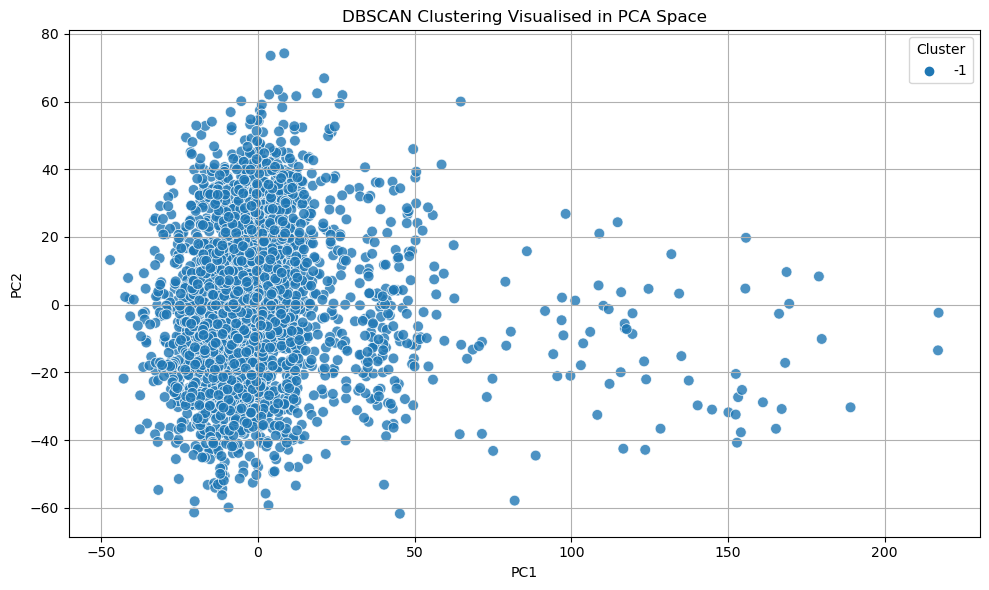

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df_db,
    x="PC1",
    y="PC2",
    hue="DBSCAN_Cluster",
    palette="tab10",
    s=60,
    alpha=0.8
)
plt.title("DBSCAN Clustering Visualised in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

## Gaussian Mixture Model (GMM) Clustering

Previously (after PCA based clustering) we tried DBSCAN and we observed that it failed to identify meaningful clusters, likely due to the sparse distribution of data in PCA space and the sensitivity of DBSCAN to its parameters. To increase the possibilites, we applied the Gaussian Mixture Model (GMM) as an alternative clustering method.

Additional reason for the selection of GMM?

- Unlike KMeans, GMM allows elliptical clusters and accounts for cluster overlap, which is common in biological data.

- It provides a probabilistic framework, assigning each sample to a cluster based on likelihood rather than strict boundaries.

- It works well on PCA-reduced data like ours, where unnecessary noise and random variation have already been removed, making the patterns in the data clearer and easier to cluster.

In [47]:
from sklearn.mixture import GaussianMixture

We used Gaussian Mixture Model (GMM) to cluster the samples based on their PCA-reduced gene expression data (X_pca_30). We set the number of clusters to 2, in line with earlier findings from PCA and silhouette analysis.

Once the model was fitted, it assigned each sample a cluster label based on the probability of belonging to each group.

In [48]:
# Fit GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_pca_30)

# Build DataFrame with labels and PCA for plotting
gmm_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"], index=X.index)
gmm_df["GMM_Cluster"] = gmm_labels.astype(str)
gmm_df["Sample ID"] = gmm_df.index

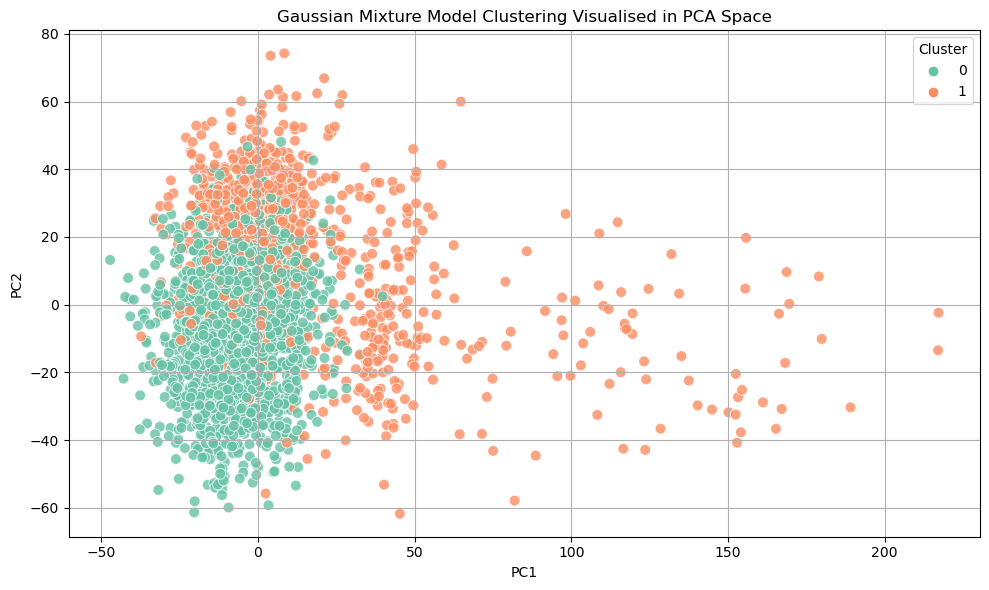

In [49]:
# Plot GMM clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=gmm_df,
    x="PC1", y="PC2",
    hue="GMM_Cluster",
    palette="Set2",
    s=60, alpha=0.8
)
plt.title("Gaussian Mixture Model Clustering Visualised in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()

This 2D scatter plot shows how samples are grouped based on the clusters identified by the Gaussian Mixture Model (GMM). Each point represents a sample, plotted using its first two principal components (PC1 and PC2).

The two colours represent the two clusters discovered by GMM. Compared to KMeans, GMM allows for overlapping and more flexible cluster shapes, which is useful for capturing subtle biological differences in high-dimensional gene expression data. 

Visually, the results from GMM and KMeans appear similar in a way that both divide the samples in comparable ways. However, the underlying approach differs:

- **KMeans** uses fixed circular boundaries based on distance to cluster centres.

- **GMM** does not force samples into hard boundaries. Instead of saying "this sample definitely belongs to cluster 0", it looks at how likely a sample is to belong to each cluster, like saying "this sample has a 70% chance of being in cluster 0 and 30% in cluster 1".

    - It also allows clusters to take on oval (elliptical) shapes and overlap with each other, which is more realistic for biological data where groupings aren’t always perfectly separate.

So in comparsion, GMM is more flexible in approach to clustering than KMeans, which always draws sharp, equal-sized circles around cluster centres.



In [50]:
# Merge expression data with GMM cluster labels
X_scaled_df["Sample ID"] = X_scaled_df.index

expr_gmm_df = pd.merge(
    X_scaled_df,
    gmm_df[["Sample ID", "GMM_Cluster"]],
    on="Sample ID",
    how="inner"
)

expr_gmm_df.set_index("Sample ID", inplace=True)

# Group by GMM cluster and compute mean expression
gmm_cluster_means_df = expr_gmm_df.groupby("GMM_Cluster").mean()

# Identify top 10 genes per cluster by expression difference
top_genes_per_gmm_cluster = {}

for cluster in gmm_cluster_means_df.index:
    this_cluster = gmm_cluster_means_df.loc[cluster]
    others_avg = gmm_cluster_means_df.drop(index=cluster).mean()
    diff = this_cluster - others_avg
    top_genes = diff.sort_values(ascending=False).head(10)
    top_genes_per_gmm_cluster[cluster] = top_genes

# View results
for cluster, genes in top_genes_per_gmm_cluster.items():
    print(f"\nTop GMM-cluster marker genes for Cluster {cluster}:")
    print(genes)


Top GMM-cluster marker genes for Cluster 0:
KDM4B       1.414547
ESR1        1.382707
DEGS2       1.378997
BCAM        1.366665
ZMYND10     1.348574
GATA3       1.337905
THSD4       1.335399
C12orf10    1.334598
P4HTM       1.333951
PLEKHH3     1.311991
dtype: float64

Top GMM-cluster marker genes for Cluster 1:
PSAT1       1.314988
ABRACL      1.213962
CENPW       1.095072
RARRES1     1.051576
ADAMDEC1    1.045302
YBX1        1.037827
PDIA6       1.032741
CTSC        1.031244
RRM2        1.024542
GBP1        0.997940
dtype: float64


Once the samples were assigned to clusters by the Gaussian Mixture Model, we aimed to identify the most distinctive genes (marker genes) for each cluster i.e., genes that are more highly expressed in one group compared to the others. 

for each cluster:

- It compared that cluster's average gene expression against the average of all other clusters.

- It calculated the expression difference.

- It selected the top 10 genes showing the largest positive differences — meaning these genes are most characteristic of that cluster.

- Finally, it prints the top marker genes for each GMM cluster.

## 3D PCA Plot with Metadata Colouring (GMM Clustering Context)
To better understand how GMM-discovered clusters relate to clinical and biological variables, we created an interactive 3D PCA scatter plot here as well. This visualisation allows the user to colour the samples based on any metadata field using a dropdown menu.

The samples are plotted along the first three principal components (PC1, PC2, PC3), and their original GMM cluster assignments are overlaid using different marker shapes. The plot is fully interactive and it can be panned, zoomed, rotated, and saved in multiple formats (HTML, PNG, JPEG, SVG) for reporting or further analysis.

In [51]:
# -----------------------------------
# Metadata options for dropdown
# -----------------------------------
metadata_options = [
    "age at diagnosis", "tumor size",
    "lymph node group", "lymph node status", "er status",
    "pgr status", "her2 status", "ki67 status", "nhg", "pam50 subtype",
    "clinical groups", "histopathological type", "endocrine treated",
    "chemo treated", "overall survival days", "overall survival years",
    "overall survival event", "relapse free interval days",
    "relapse free interval years", "relapse free interval event",
    "esr1 expression: log2(tpm+0.1)", "esr2 expression: log2(tpm+0.1)"
]

# -----------------------------------
# Dropdown Widgets
# -----------------------------------
dropdown = widgets.Dropdown(
    options=metadata_options,
    value="pam50 subtype",
    description="Colour by:"
)

format_dropdown = widgets.Dropdown(
    options=["png", "jpeg", "svg", "html"],
    value="html",
    description="Save format:"
)

filename_input = widgets.Text(
    value="gmm_3d_plot",
    description="Filename:",
    placeholder="Enter filename (no extension)"
)

save_button = widgets.Button(description="Save Plot", button_style="success")

# -----------------------------------
# Global variable to store last plot
# -----------------------------------
last_fig = None

# -----------------------------------
# Plotting function
# -----------------------------------
def plot_gmm_3d(meta_choice):
    global last_fig
    gmm_3d_df = pd.DataFrame(X_pca[:, :3], columns=["PC1", "PC2", "PC3"], index=X.index)
    gmm_3d_df["Sample ID"] = gmm_3d_df.index
    gmm_3d_df["GMM Cluster"] = gmm_labels.astype(str)

    # Merge with metadata
    merged_df = pd.merge(gmm_3d_df, meta_df, on="Sample ID", how="inner")

    # Create 3D plot
    fig = px.scatter_3d(
        merged_df,
        x="PC1", y="PC2", z="PC3",
        color=meta_choice,
        symbol="GMM Cluster",  # Optional: shows cluster shape difference
        title=f"3D PCA Plot Coloured by '{meta_choice}' (GMM Clusters Overlayed)",
        opacity=0.7,
        height=700
    )

    fig.update_layout(
        scene=dict(
            xaxis_title=f"PC1 ({explained_variance[0]:.1f}%)",
            yaxis_title=f"PC2 ({explained_variance[1]:.1f}%)",
            zaxis_title=f"PC3 ({explained_variance[2]:.1f}%)"
        )
    )

    last_fig = fig
    fig.show()

# -----------------------------------
# Save button function
# -----------------------------------
def save_plot(b):
    if last_fig:
        fmt = format_dropdown.value
        fname = filename_input.value.strip()
        if not fname:
            print("Please enter a filename.")
            return
        full_name = f"{fname}.{fmt}"
        if fmt == "html":
            last_fig.write_html(full_name)
        else:
            last_fig.write_image(full_name)
        print(f"Plot saved as: {full_name}")
    else:
        print("No plot to save. Please generate one first.")

save_button.on_click(save_plot)

# -----------------------------------
# Display interactive widgets
# -----------------------------------
widgets.interact(plot_gmm_3d, meta_choice=dropdown)
display(filename_input, format_dropdown, save_button)


interactive(children=(Dropdown(description='Colour by:', index=9, options=('age at diagnosis', 'tumor size', '…

Text(value='gmm_3d_plot', description='Filename:', placeholder='Enter filename (no extension)')

Dropdown(description='Save format:', index=3, options=('png', 'jpeg', 'svg', 'html'), value='html')

Button(button_style='success', description='Save Plot', style=ButtonStyle())

In [52]:
# Format GMM marker gene data into a tidy DataFrame
rows = []
for cluster, gene_series in top_genes_per_gmm_cluster.items():
    for gene, expr_diff in gene_series.items():
        rows.append({
            "Cluster": cluster,
            "Gene": gene,
            "Expression Difference": expr_diff
        })

df_gmm_markers = pd.DataFrame(rows)

# Adding HPA links
df_gmm_markers["HPA Link"] = df_gmm_markers["Gene"].apply(
    lambda gene: f'<a href="https://www.proteinatlas.org/search/{gene}" target="_blank">{gene}</a>'
)

# Reorder columns
df_gmm_markers = df_gmm_markers[["Cluster", "Gene", "Expression Difference", "HPA Link"]]

# Generate scrollable HTML table
styled_html = f"""
<div style="max-height: 500px; overflow-y: auto; border: 1px solid #ddd; border-radius: 6px; font-family: Arial, sans-serif;">
  <table style="border-collapse: collapse; width: 100%;">
    <thead style="background-color: #e0e0e0; position: sticky; top: 0; z-index: 1;">
      <tr>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Cluster</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Gene</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Expression Difference</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">HPA Link</th>
      </tr>
    </thead>
    <tbody>
"""

for _, row in df_gmm_markers.iterrows():
    styled_html += f"""
      <tr>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Cluster']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Gene']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Expression Difference']:.3f}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['HPA Link']}</td>
      </tr>
    """

styled_html += """
    </tbody>
  </table>
</div>
"""

# Display it
display(HTML(styled_html))

In [53]:
# Export to CSV
df_gmm_markers.to_csv("top_marker_genes_per_gmm_cluster.csv", index=False)
print("✅ Exported: top_marker_genes_per_gmm_cluster.csv")

✅ Exported: top_marker_genes_per_gmm_cluster.csv


## Exploring T-sne with Clustering (Caution):

Although t-SNE is suitable for visualisation and not clustering, we applied KMeans on the t-SNE output to explore whether any meaningful sample groupings might still emerge.

This combination is not typically recommended, since t-SNE distorts distances and densities during its dimensionality reduction process. However, to demonstrate the possibilities and to compare with our PCA and GMM-based clustering, we went ahead with this approach.

The results should be interpreted as exploratory and illustrative, not definitive, but they still provide useful insight into how samples might visually separate in a non-linear embedding.

In [54]:
from sklearn.manifold import TSNE

Before applying t-SNE, we made sure to use only the samples that have matching clinical metadata. This ensures consistency across all analyses and visualisations.

We first extracted the list of sample IDs from the merged PCA-metadata dataframe. Then, we used these IDs to filter our scaled gene expression matrix, keeping only the relevant samples. Finally, we removed the extra Sample ID column, so the matrix is ready for dimensionality reduction.

This step ensures that the input to t-SNE is clean, aligned with metadata, and ready for meaningful visualisation.

In [55]:
# Extract samples present in metadata
sample_ids = merged_df["Sample ID"]

# Select only those rows from X_scaled_df and drop 'Sample ID' column
X_pca_merged = X_scaled_df.loc[sample_ids].drop(columns=["Sample ID"])

 - What Is X_pca_merged and Why Does It Look So Complex?

X_pca_merged is a matrix that contains the standardised gene expression values for all the samples that have matching clinical metadata. Each row represents a sample, and each column represents a gene.

At first glance, the table may look overwhelming because:

It includes thousands of genes (columns),

- Each value is a scaled expression level (mean = 0, std = 1),

- And the sample names (e.g. S000001) aren’t very descriptive.

But the structure is numerical representation of each sample's gene profile. While it’s not meant for manual viewing, it is meant for the input for the purpose of visualising complex patterns in the data.

In [56]:
X_pca_merged

X            CPB1   SCGB2A2       PIP       DCD    MT-CO3     MUCL1    MT-CO2  \
S000001 -0.155255  1.280813  0.414706  0.879867 -0.881704 -0.183576 -1.711883   
S000002 -0.529208 -1.035319 -0.490167 -0.610368 -1.751766 -0.871200 -1.049418   
S000003  0.817188  1.975293 -0.398484  1.471889 -0.045850  1.833851 -0.873874   
S000006 -1.045942 -0.810810 -0.571893 -0.610368  1.597817 -0.770231  1.651170   
S000011  2.313914  0.388894 -1.133025 -0.610368  0.407556 -0.323574 -0.536927   
...           ...       ...       ...       ...       ...       ...       ...   
S006780 -0.587024  1.851314  0.608854 -0.449517 -0.591021 -0.703286  0.010897   
S006781  2.824773  0.791111  2.645285  4.680257 -0.203975  0.177722 -0.292647   
S006782 -0.699973 -0.443964 -0.290240 -0.456384  1.070805 -0.327451  0.605952   
S006783 -0.187398  0.833635  0.664728 -0.501181  1.323157  1.103486  0.511866   
S006786 -0.723111  0.306251 -0.906046 -0.610368 -0.040456 -0.026786  0.741630   

X          MT-CO1    MT-ND4   MT-ATP6  ...   TRAPPC9   TUBGCP2     ICAM3  \
S000001 -0.244970 -1.380581 -1.760293  ...  0.140029  0.421822 -0.192823   
S000002 -1.088580 -0.853526 -2.452164  ... -0.114584  1.418646  0.378405   
S000003 -0.062760 -0.762071 -1.202632  ...  0.861952 -0.533477  0.245012   
S000006  2.209529  2.082010  3.779346  ...  1.460248  0.650139  0.465314   
S000011 -0.217068 -0.194973 -0.675602  ... -0.369863  0.767173  0.610062   
...           ...       ...       ...  ...       ...       ...       ...   
S006780 -0.345100 -0.603398 -0.505072  ...  0.622065  1.326461  0.507879   
S006781  0.092680 -0.468513 -0.118130  ... -0.204495 -0.392140 -1.738054   
S006782  1.039375  0.468366  0.569035  ... -0.112491  1.488809 -0.662992   
S006783  1.734153  1.471971  0.883151  ... -1.139036 -0.628031  0.090539   
S006786  0.604541  0.102560  0.061765  ...  0.741917  0.825015  0.480775   

X        ANKRD13D     SYNE4      GCLC      MT1M    RUNDC1   ZCCHC17     SMIM4  
S000001 -1.737688 -0.203236  1.344582  0.327978  0.301551 -0.499085  0.352229  
S000002 -0.314651 -0.438401  1.367088  2.632188 -1.759009 -1.008626 -0.834561  
S000003 -0.579493 -0.227080 -0.643988  0.346806  0.125168 -1.930571  0.017719  
S000006 -0.638450 -0.905996 -0.474271  0.292740 -2.732693  0.331830 -1.427673  
S000011 -0.926315  0.166667 -1.598665  0.135119  0.542403 -0.286350 -1.115604  
...           ...       ...       ...       ...       ...       ...       ...  
S006780  0.539600  1.156270 -0.608537 -1.276529  1.810950 -2.245293  1.182172  
S006781  1.416102  0.377537 -0.273075  0.112626  0.653964 -0.260385  0.502779  
S006782  0.335457  0.612465  0.290219  0.160800  0.989520  1.334115 -1.420372  
S006783 -0.085854 -1.043924 -0.277371  0.613382 -0.402060 -1.466388 -0.621299  
S006786 -0.882739  0.486250  0.766750 -1.300944  3.323451  1.580021  0.233546  

[2913 rows x 5000 columns]

## Applying PCA as a Preprocessing Step:

Before applying t-SNE, we first reduced the data to the top 50 principal components using PCA. This helps to denoise the data, speed up computation, and improve the quality of the t-SNE output — especially when working with thousands of genes.

This is a commonly recommended practice when using t-SNE on high-dimensional data like gene expression. For more details, you can see this helpful guide:

Practical Considerations for Using t-SNE: 
https://web.archive.org/web/20210120195626/http://simranmetric.com/practical-considerations-for-using-tsne/

In [57]:
X_pca_merged_50 = PCA(n_components=50).fit_transform(X_pca_merged)

After PCA preprocessing, we used t-SNE to reduce the data to two dimensions, making it easier to visualise complex sample relationships.

We chose the following parameters to guide the behaviour of the algorithm:

- n_components=2: Projects the data into 2D space for easy plotting.

- perplexity=30: Balances how t-SNE considers local vs. global structure; values between 5–50 are common, and 30 works well for medium-sized datasets.

- learning_rate=200: Controls how fast t-SNE adapts during training. A value of 200 is typically stable for datasets of this scale.

- random_state=42: Ensures reproducibility, so results stay the same each time the code is run.

Once the t-SNE coordinates were calculated, we added them to the metadata table for use in plots and downstream analysis.

In [58]:
# Step 2: Run t-SNE on matched samples
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_pca_merged_50)

# Step 3: Add t-SNE output to merged metadata
merged_df["tSNE-1"] = X_tsne[:, 0]
merged_df["tSNE-2"] = X_tsne[:, 1]

### Checking if the metadata merge was successful

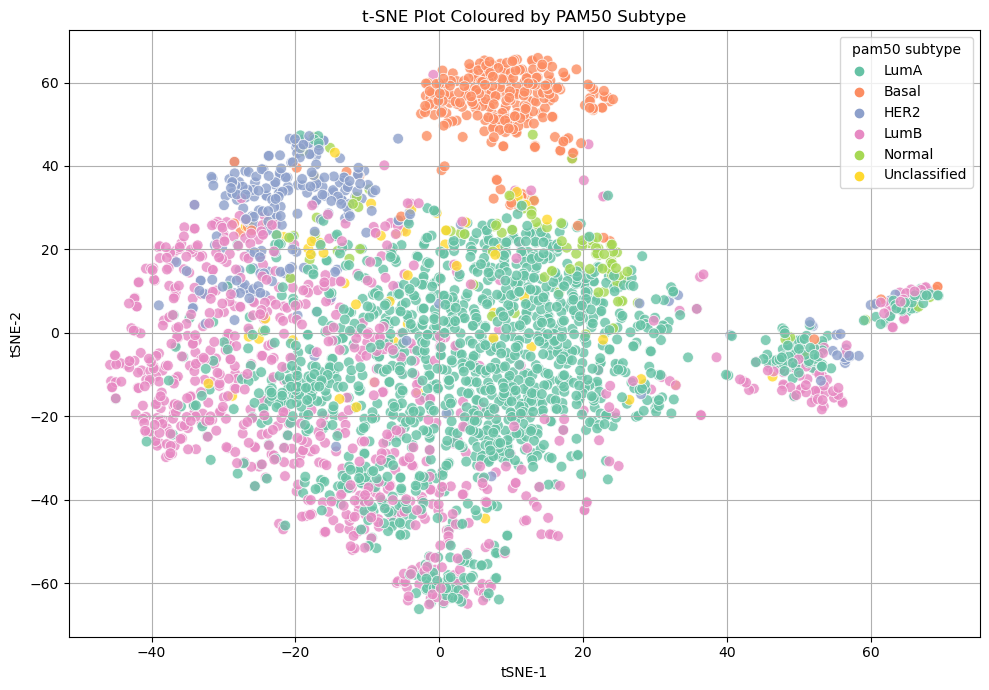

In [59]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=merged_df,
    x="tSNE-1", y="tSNE-2",
    hue="pam50 subtype",
    palette="Set2",
    s=60,
    alpha=0.8
)
plt.title("t-SNE Plot Coloured by PAM50 Subtype")
plt.grid(True)
plt.tight_layout()
plt.show()

### Extracting the 2D t-SNE coordinates from the merged DataFrame into a NumPy array.
- Needed to prepare for clustering

In [60]:
X_tsne = merged_df[["tSNE-1", "tSNE-2"]].values

We applied KMeans clustering with k = 5 on the two-dimensional output of t-SNE to explore potential groupings among samples. The resulting cluster labels were added to the metadata and visualised in a 2D scatter plot, where each point represents a sample positioned by its t-SNE coordinates.

While this approach is not ideal for clustering due to t-SNE's non-linear distortions, the plot helps us visually explore sample separations and see if the t-SNE layout shows any clear patterns or groupings in the data.

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



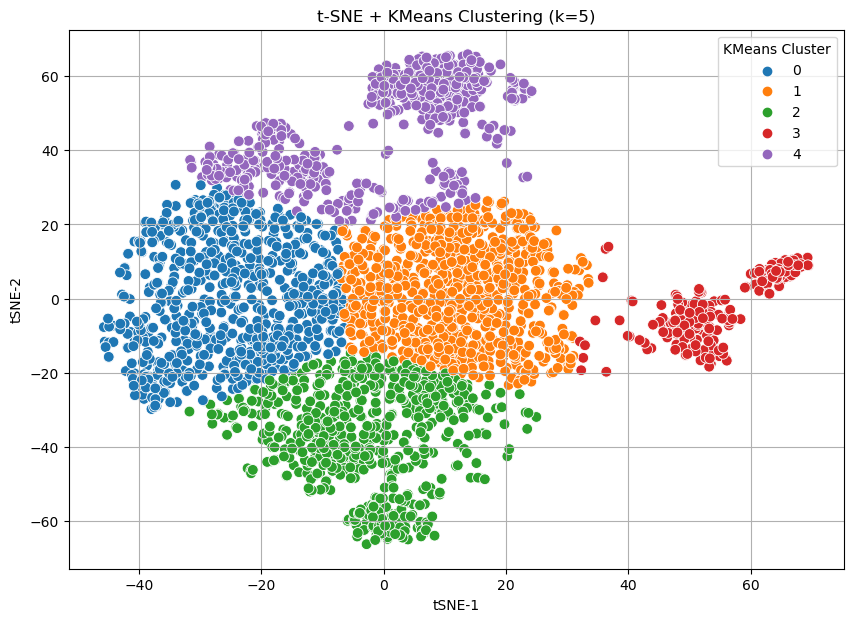

In [61]:
from sklearn.cluster import KMeans

# Set number of clusters (can tune this)
kmeans = KMeans(n_clusters=5, random_state=42)
merged_df["KMeans Cluster"] = kmeans.fit_predict(X_tsne)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x="tSNE-1", y="tSNE-2", hue="KMeans Cluster", palette="tab10", s=60)
plt.title("t-SNE + KMeans Clustering (k=5)")
plt.grid(True)
plt.show()

To explore how many clusters might make sense for the t-SNE output, we used the Elbow Method. This involves fitting KMeans with different values of k (from 2 to 10) and plotting the Within-Cluster Sum of Squares (WCSS).

WCSS measures how close the data points in each cluster are to their cluster’s centre. In other words, how compact each cluster is. Lower WCSS means tighter clusters, which is generally better.

As k increases, WCSS gets smaller, but the improvement eventually slows down. The “elbow” point on the graph shows where adding more clusters stops making a big difference — this helps us choose a good number of clusters. In our case, we chose k = 5 based on this plot.

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' 

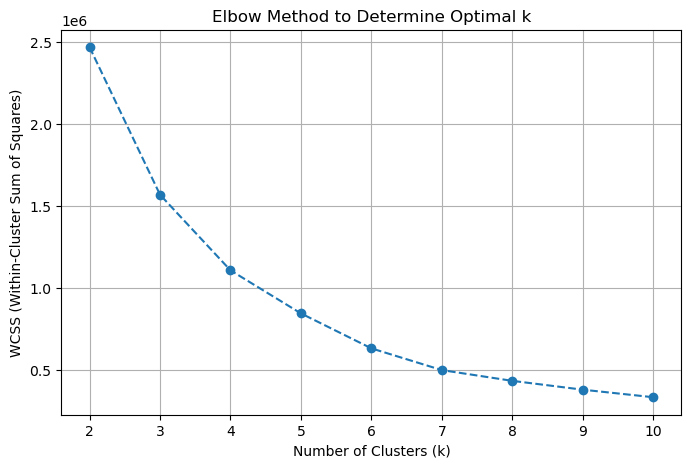

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use your t-SNE coordinates
X = merged_df[["tSNE-1", "tSNE-2"]].values

# Try multiple values of k
wcss = []
K_range = range(2, 11)  # Try k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.grid(True)
plt.show()

We observe that the WCSS decreases sharply from k=2 to k=4, and then the drop becomes more gradual. Around k = 5, the curve begins to "bend" or flatten, suggesting that this is a good balance between compact clusters and model simplicity.

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' 

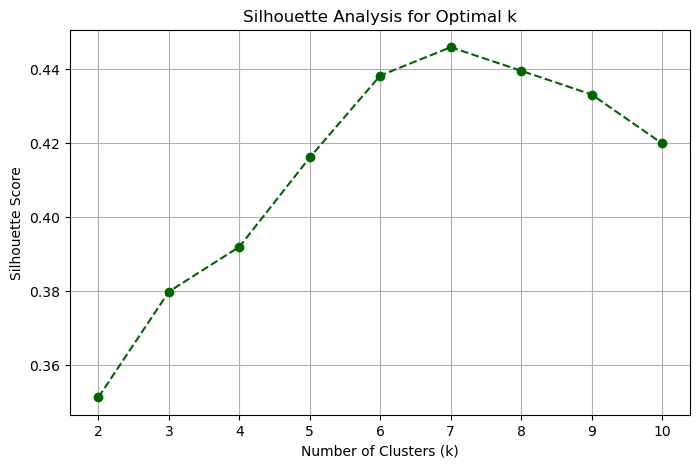

In [63]:
from sklearn.metrics import silhouette_score

X = merged_df[["tSNE-1", "tSNE-2"]].values

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='darkgreen')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.grid(True)
plt.show()


This plot shows the Silhouette Score for different values of k (number of clusters) applied to the t-SNE output.

The silhouette score measures how well-separated and cohesive the clusters are, higher values mean better-defined clusters.

From the graph, we can see that the score increases steadily and peaks at k = 7, suggesting that 7 clusters produce the best structure based on this metric. After that, the score slightly drops, indicating weaker separation.

So while the elbow method suggested k = 5, the silhouette analysis points to k = 7 as potentially better.

Based on the silhouette analysis, we applied KMeans clustering with k = 7 to the 2D t-SNE coordinates. The resulting cluster labels were added to the dataset, and a scatter plot was created to visualise the groupings.

Each colour in the plot represents a different cluster, showing how samples are separated within the t-SNE embedding. While this clustering is exploratory, it helps highlight local groupings and potential biological substructures worth further investigation.

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



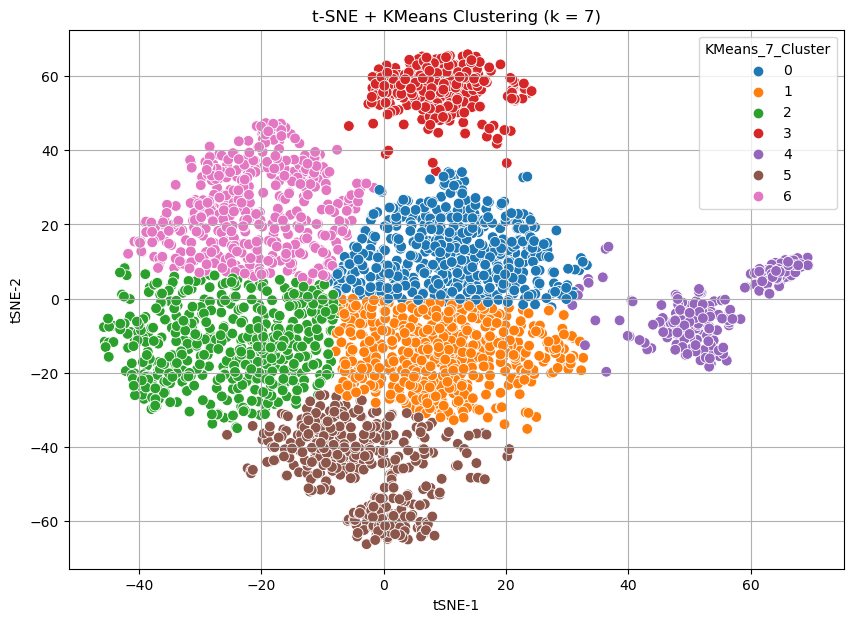

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define input (t-SNE already computed)
X_tsne = merged_df[["tSNE-1", "tSNE-2"]].values

# Apply KMeans with k = 7
kmeans_7 = KMeans(n_clusters=7, random_state=42)
merged_df["KMeans_7_Cluster"] = kmeans_7.fit_predict(X_tsne)

# Plot the result
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=merged_df,
    x="tSNE-1", y="tSNE-2",
    hue="KMeans_7_Cluster",
    palette="tab10", s=60
)
plt.title("t-SNE + KMeans Clustering (k = 7)")
plt.grid(True)
plt.show()

Like the metadata-coloured plots seen earlier in the PCA and GMM sections, this interactive visualisation allows users to explore the t-SNE 2D plot by colouring the samples based on any selected metadata feature (e.g., PAM50 subtype, ER status, tumour size, etc.).

A dropdown menu makes it easy to switch between variables. The plot itself is interactive and the users can zoom, pan, rotate (in 3D if extended), and export the visual in various formats. This makes it easier to assess how known clinical or biological variables relate to the distribution of samples in t-SNE space.

In [65]:
# Metadata options for colouring
metadata_options = [
    "age at diagnosis", "tumor size", "lymph node group", "lymph node status",
    "er status", "pgr status", "her2 status", "ki67 status", "nhg", "pam50 subtype",
    "clinical groups", "histopathological type", "endocrine treated", "chemo treated",
    "overall survival days", "overall survival years", "overall survival event",
    "relapse free interval days", "relapse free interval years", "relapse free interval event",
    "esr1 expression: log2(tpm+0.1)", "esr2 expression: log2(tpm+0.1)"
]

# Widgets
dropdown = widgets.Dropdown(
    options=metadata_options,
    value="pam50 subtype",
    description="Colour by:"
)

format_dropdown = widgets.Dropdown(
    options=["png", "jpeg", "svg", "html"],
    value="html",
    description="Save format:"
)

filename_input = widgets.Text(
    value="tsne_plot",
    description="Filename:",
    placeholder="Enter filename (no extension)"
)

save_button = widgets.Button(description="Save Plot", button_style="success")

# Global figure store
last_fig = None

# Plotting function
def plot_tsne_2d(meta_choice):
    global last_fig
    
    # Ensure metadata is already merged with tSNE data
    if "tSNE-1" not in merged_df.columns or meta_choice not in merged_df.columns:
        print(f"Missing data: '{meta_choice}' or tSNE coordinates not found in merged_df.")
        return

    fig = px.scatter(
        merged_df,
        x="tSNE-1", y="tSNE-2",
        color=meta_choice,
        title=f"t-SNE Scatter Plot Coloured by '{meta_choice}'",
        opacity=0.75,
        height=650
    )
    
    fig.update_traces(marker=dict(size=6))
    fig.update_layout(
        xaxis_title="tSNE-1",
        yaxis_title="tSNE-2"
    )
    
    last_fig = fig
    fig.show()

# Save function
def save_plot(b):
    if last_fig:
        fmt = format_dropdown.value
        fname = filename_input.value.strip()
        if not fname:
            print("Please enter a filename.")
            return
        full_name = f"{fname}.{fmt}"
        if fmt == "html":
            last_fig.write_html(full_name)
        else:
            # Requires kaleido for image export
            last_fig.write_image(full_name)
        print(f"Plot saved as: {full_name}")
    else:
        print("No plot to save. Please generate one first.")

save_button.on_click(save_plot)

# Run interactive widget
widgets.interact(plot_tsne_2d, meta_choice=dropdown)
display(filename_input, format_dropdown, save_button)


interactive(children=(Dropdown(description='Colour by:', index=9, options=('age at diagnosis', 'tumor size', '…

Text(value='tsne_plot', description='Filename:', placeholder='Enter filename (no extension)')

Dropdown(description='Save format:', index=3, options=('png', 'jpeg', 'svg', 'html'), value='html')

Button(button_style='success', description='Save Plot', style=ButtonStyle())

We re-applied KMeans clustering with k = 7 to the t-SNE coordinates to ensure up-to-date cluster labels were available in the dataset.

Next, we merged these cluster labels with the scaled gene expression matrix (TPM data), linking each sample to its respective cluster. After setting the proper index, we grouped the data by cluster and computed the average gene expression for each gene within each cluster.

The table you will see below is of cluster-wise averages, which is for identifying marker genes that are more highly expressed in one cluster compared to others.

In [66]:
# Recompute if needed
from sklearn.cluster import KMeans

# Extract t-SNE values (assuming already stored in merged_df)
X_tsne = merged_df[["tSNE-1", "tSNE-2"]].values

# Apply KMeans clustering with k = 7
kmeans_7 = KMeans(n_clusters=7, random_state=42)
merged_df["KMeans_7_Cluster"] = kmeans_7.fit_predict(X_tsne)

d:\Apps\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [67]:
# Step 1: Prepare expression matrix and cluster labels
# X_scaled_df: (samples × genes) — standardised TPM matrix
# Adding Sample ID incase not added
X_scaled_df["Sample ID"] = X_scaled_df.index

# Merge with KMeans cluster labels from merged_df
expr_cluster_df = pd.merge(X_scaled_df, merged_df[["Sample ID", "KMeans_7_Cluster"]], on="Sample ID", how="inner")

# Drop Sample ID to avoid grouping issues
expr_cluster_df.set_index("Sample ID", inplace=True)

# Group by cluster and compute mean per gene
cluster_means_df = expr_cluster_df.groupby("KMeans_7_Cluster").mean()

# Preview result
print(f"Cluster-wise mean expression shape: {cluster_means_df.shape}")
cluster_means_df.head()

Cluster-wise mean expression shape: (7, 5000)


CPB1   SCGB2A2       PIP       DCD    MT-CO3     MUCL1  \
KMeans_7_Cluster                                                               
0                -0.089280  0.399088  0.206096  0.067394  0.084164  0.428815   
1                -0.012638  0.133825  0.277775  0.013515 -0.222653  0.052892   
2                 0.230222 -0.120970 -0.379203 -0.157126  0.080575 -0.366052   
3                -0.705425 -1.042424 -1.297699 -0.350509 -0.666550 -0.697293   
4                -0.001145  0.127101  0.152245 -0.039255  1.167680 -0.004198   

                    MT-CO2    MT-CO1    MT-ND4   MT-ATP6  ...   TRAPPC9  \
KMeans_7_Cluster                                          ...             
0                -0.182289  0.017353  0.003728 -0.088352  ... -0.436656   
1                -0.433100 -0.189234 -0.237039 -0.182486  ... -0.114715   
2                 0.156541  0.021165  0.068484  0.080326  ...  0.932949   
3                 0.035567 -0.631779 -0.214593 -0.136173  ... -0.202726   
4                 0.929125  1.647682  1.255811  0.893257  ... -0.798111   

                   TUBGCP2     ICAM3  ANKRD13D     SYNE4      GCLC      MT1M  \
KMeans_7_Cluster                                                               
0                -0.052223  0.100662 -0.188154 -0.377744 -0.325155  0.855868   
1                 0.164012 -0.033360 -0.037471  0.255977  0.043419 -0.000531   
2                 0.257286  0.003105  0.326990  0.609273 -0.094325 -0.327927   
3                -0.147310  0.075842 -0.008582 -0.980024 -0.260166  0.302747   
4                -1.563426 -1.087198 -1.085490 -1.076047  0.794247 -0.519838   

                    RUNDC1   ZCCHC17     SMIM4  
KMeans_7_Cluster                                
0                -0.068601 -0.277928  0.045980  
1                 0.514326  0.190236  0.072376  
2                 0.411468  0.443451 -0.044111  
3                -1.509425  0.150175 -0.401339  
4                -0.155129 -0.530067 -0.956678  

[5 rows x 5000 columns]

In [68]:
# Store top genes per cluster
top_genes_per_cluster = {}

# Loop through each cluster (0 to 6)
for cluster in cluster_means_df.index:
    # Expression values for this cluster
    cluster_expr = cluster_means_df.loc[cluster]
    
    # Mean expression of other clusters
    other_expr = cluster_means_df.drop(index=cluster).mean()
    
    # Difference
    diff = cluster_expr - other_expr
    
    # Top 10 genes with largest positive difference
    top_genes = diff.sort_values(ascending=False).head(10)
    
    # Store
    top_genes_per_cluster[cluster] = top_genes

# Display result
for c, genes in top_genes_per_cluster.items():
    print(f"\n Top marker genes for Cluster {c}:")
    print(genes)


 Top marker genes for Cluster 0:
FXYD1     1.583007
PLAC9     1.537407
IGFBP6    1.518871
HSPB6     1.514434
MMRN2     1.513690
ADGRA2    1.462426
ECSCR     1.458627
GSN       1.447405
TNXB      1.406376
VWF       1.405295
dtype: float64

 Top marker genes for Cluster 1:
TGFB3      1.002967
LRRC17     0.966249
PRAG1      0.965667
WBP1L      0.952662
COL16A1    0.948354
GALNT10    0.938311
MATN3      0.936406
TSPAN9     0.933562
C4A        0.930728
LAMP5      0.930669
dtype: float64

 Top marker genes for Cluster 2:
GRINA        1.253300
RAMP1        1.203664
HAGH         1.196581
RAB11FIP3    1.190446
TRAPPC9      1.179386
CD2BP2       1.177517
PYCR3        1.177313
MAPK3        1.170400
POLR3K       1.162671
KCNK15       1.154390
dtype: float64

 Top marker genes for Cluster 3:
FOXC1      2.499778
VGLL1      2.335727
PSAT1      2.221838
CENPW      2.123291
YBX1       2.092811
HAPLN3     2.048016
KRT16      1.942746
UQCRH      1.883118
GABRP      1.848289
SLC43A3    1.846040
dtype: fl

In [69]:
# print(X_scaled_df.shape)
# print(merged_df.shape)
# print("Common samples:", len(set(X_scaled_df.index).intersection(merged_df["Sample ID"])))
# print("Available KMeans_7_Cluster:", merged_df["KMeans_7_Cluster"].unique())

d:\Apps\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



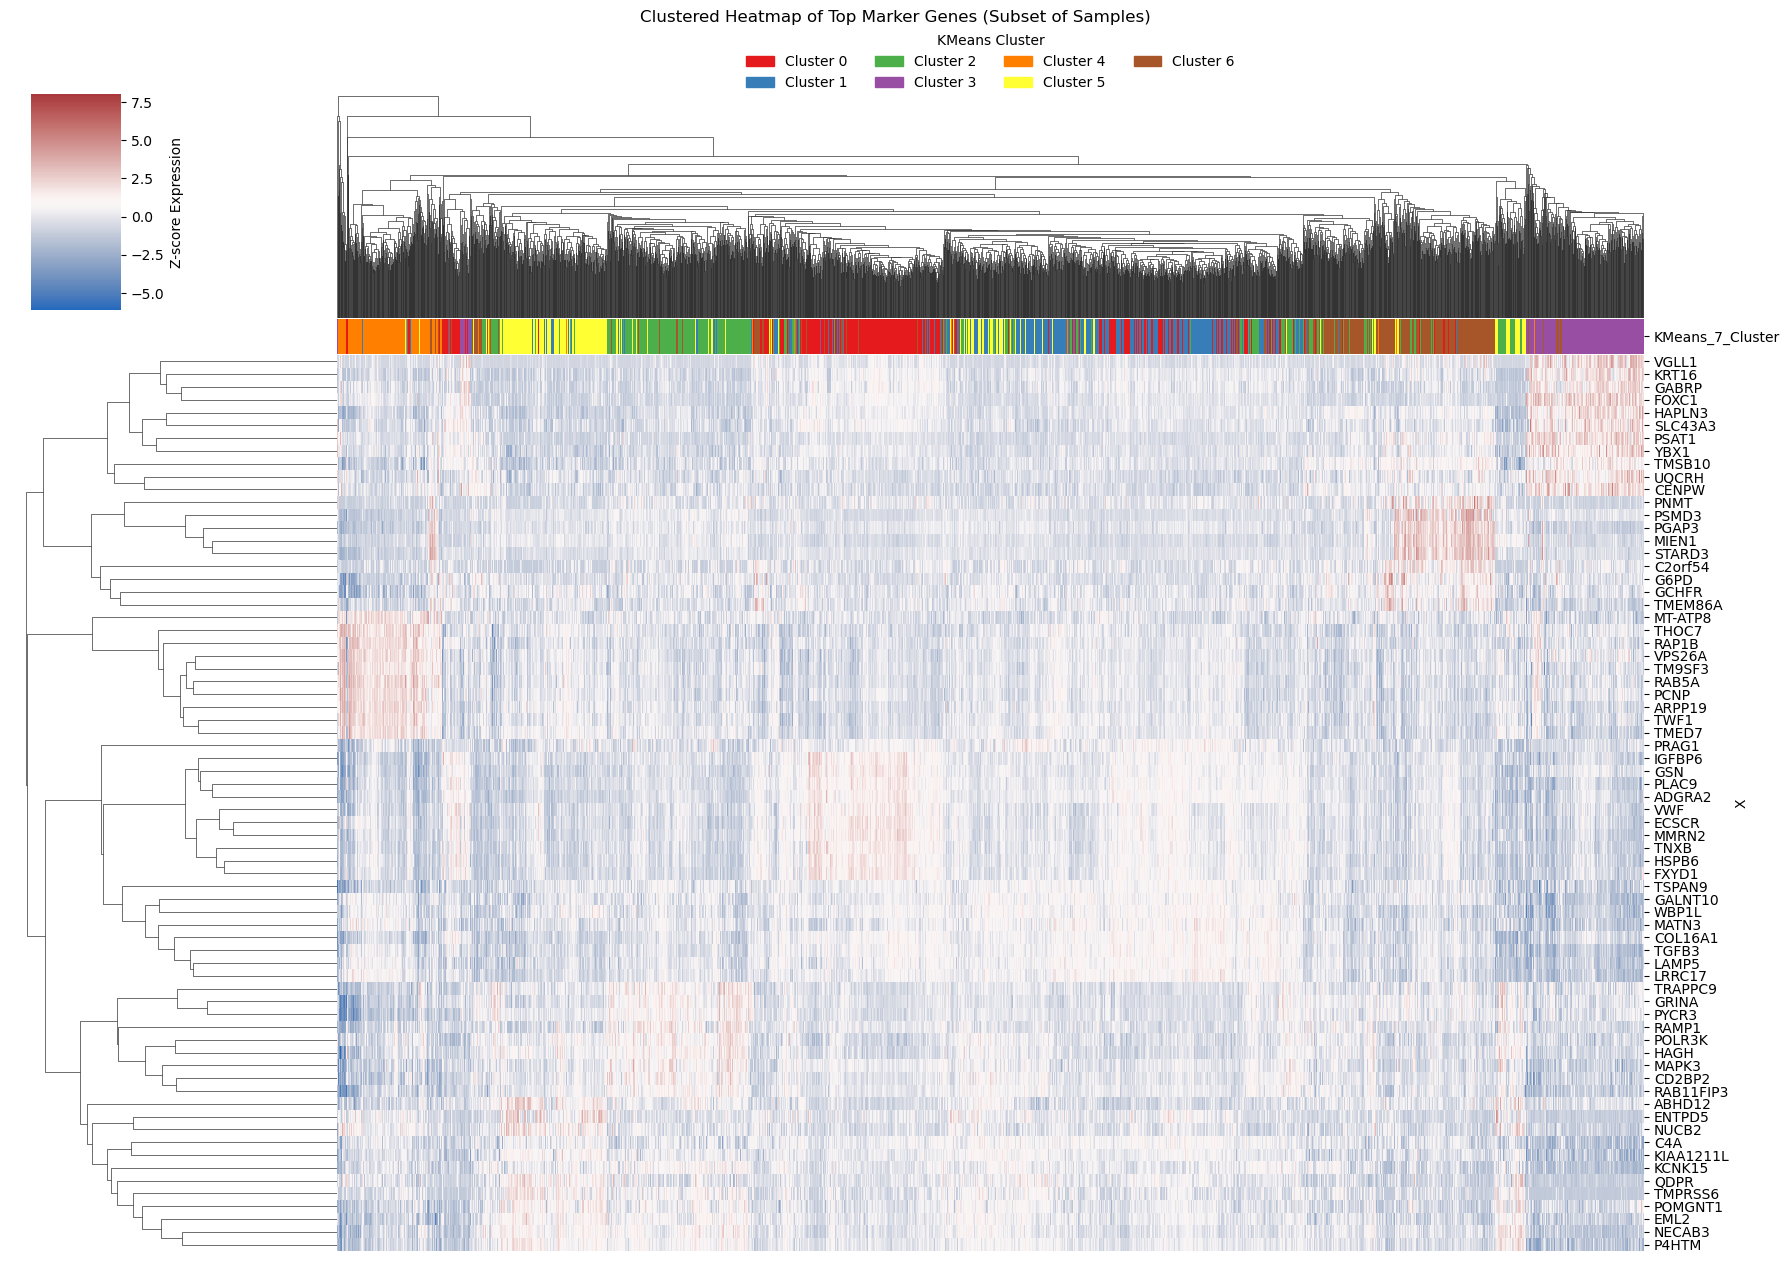

In [70]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# --- Step 1: Create list of top 10 genes per cluster ---
top_genes = []
for genes in top_genes_per_cluster.values():
    top_genes.extend(genes.index.tolist())
top_genes = list(set(top_genes))  # remove duplicates

# --- Step 2: Subset expression data and standardise (z-score) ---
# Reuse X_scaled_df, which has standardised TPMs
heatmap_matrix = X_scaled_df.loc[merged_df["Sample ID"], top_genes].T  # genes × samples

# --- Step 3: Assign cluster labels and colours ---
cluster_lut = {
    0: "#e41a1c",
    1: "#377eb8",
    2: "#4daf4a",
    3: "#984ea3",
    4: "#ff7f00",
    5: "#ffff33",
    6: "#a65628"
}

cluster_labels = merged_df.set_index("Sample ID").loc[heatmap_matrix.columns, "KMeans_7_Cluster"]
cluster_colours = cluster_labels.map(cluster_lut)

# --- Step 4: Create legend patches ---
legend_patches = [
    mpatches.Patch(color=cluster_lut[cluster], label=f"Cluster {cluster}")
    for cluster in sorted(cluster_lut.keys())
]

# --- Step 5: Plot clustermap ---
g = sns.clustermap(
    heatmap_matrix,
    col_colors=cluster_colours,
    cmap="vlag",
    figsize=(18, 12),
    xticklabels=False,
    yticklabels=True,
    cbar_kws={"label": "Z-score Expression"}
)

# --- Step 6: Add legend ---
g.ax_col_dendrogram.legend(
    handles=legend_patches,
    title="KMeans Cluster",
    loc="center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=4,
    frameon=False
)

plt.suptitle("Clustered Heatmap of Top Marker Genes (Subset of Samples)", y=1.05)
plt.show()

## Clustered Heatmap of Top Marker Genes – Explained
This graph is a clustered heatmap that visualises the expression of the top marker genes (identified via t-SNE + KMeans clustering) across all samples in the dataset. It's a powerful way to summarise and compare gene activity patterns across different patient groups or biological subtypes.

How to Read the Heatmap:
- Rows = Genes: Each row represents one of the top marker genes. These were selected based on their differential expression across the KMeans (k=7) clusters.

- Columns = Samples: Each vertical column represents a patient/sample. The samples are grouped by their KMeans_7_Cluster labels (shown as coloured bars above the heatmap).

- Colour Intensity = Z-score of Gene Expression:

    - Red = High expression (upregulated)

    - Blue = Low expression (downregulated)

    - White = Average expression (near mean)

- Top Legend (colours): Represents the cluster each sample belongs to — e.g. red for Cluster 0, blue for Cluster 1, and so on.These colours match the cluster assignments from t-SNE + KMeans clustering.

- Left Tree = Gene Clustering (Dendrogram): Genes that show similar expression profiles across samples are grouped together, revealing potential co-regulation or shared biological function.

- Top Tree = Sample Clustering: Shows how samples group together based on the expression of these top genes.

Results:
- Samples with similar expression profiles are clustered together, allowing you to visually distinguish different biological groups or potential subtypes.

- Some gene clusters (e.g. upper section) show strong red/blue patterns in specific sample clusters, indicating they may serve as potential biomarkers

To identify marker genes for each of the t-SNE + KMeans (k=7) clusters, we compared the average expression profile of each cluster to the rest.

For every cluster, we calculated the mean gene expression, then subtracted the average expression of all the other clusters combined. This highlighted genes that were particularly elevated in one cluster versus the others.

We selected the top 10 genes with the highest positive difference per cluster, these represent potential biomarkers that are most distinct for that group.

These results were compiled into a structured table and saved as "top_marker_genes_per_cluster_tsne.csv" for future reference.

Finally, we created a scrollable HTML table to display these marker genes. Each gene entry includes a direct link to the Human Protein Atlas (HPA), allowing users to explore detailed biological information with a single click making the output both informative and interactive.

In [71]:
top_genes_per_cluster = {}

for cluster in cluster_means_df.index:
    cluster_expr = cluster_means_df.loc[cluster]
    other_expr = cluster_means_df.drop(index=cluster).mean()
    diff = cluster_expr - other_expr
    top_genes = diff.sort_values(ascending=False).head(10)
    top_genes_per_cluster[cluster] = top_genes

In [72]:
top_genes

G6PD       1.341342
STARD3     1.250935
TMSB10     1.133621
MIEN1      1.088689
PSMD3      1.084525
C2orf54    1.076900
PGAP3      1.075394
TMEM86A    1.071003
PNMT       1.063495
GCHFR      1.062749
dtype: float64

In [73]:
# Convert the dictionary into a flat table
rows = []
for cluster, genes in top_genes_per_cluster.items():
    for gene, score in genes.items():
        rows.append({
            "Cluster": f"Cluster {cluster}",
            "Gene": gene,
            "Expression Difference": round(score, 4)
        })

# Create a DataFrame
biomarker_df = pd.DataFrame(rows)

# Export to CSV
biomarker_df.to_csv("top_marker_genes_per_cluster_tsne.csv", index=False)

print("✅ Exported to 'top_marker_genes_per_cluster_tsne.csv'")

✅ Exported to 'top_marker_genes_per_cluster_tsne.csv'


In [74]:
import pandas as pd
from IPython.display import display, HTML

# Load CSV
df = pd.read_csv("top_marker_genes_per_cluster_tsne.csv")

# Add HPA link
df["HPA Link"] = df["Gene"].apply(
    lambda gene: f'<a href="https://www.proteinatlas.org/search/{gene}" target="_blank">{gene}</a>'
)

# Reorder columns
df = df[["Cluster", "Gene", "Expression Difference", "HPA Link"]]

# Generate styled HTML
styled_html = f"""
<div style="max-height: 500px; overflow-y: auto; border: 1px solid #ddd; border-radius: 6px; font-family: Arial, sans-serif;">
  <table style="border-collapse: collapse; width: 100%;">
    <thead style="background-color: #e0e0e0; position: sticky; top: 0; z-index: 1;">
      <tr>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Cluster</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Gene</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Expression Difference</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">HPA Link</th>
      </tr>
    </thead>
    <tbody>
"""

for _, row in df.iterrows():
    styled_html += f"""
      <tr>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Cluster']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Gene']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Expression Difference']:.3f}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['HPA Link']}</td>
      </tr>
    """

styled_html += """
    </tbody>
  </table>
</div>
"""

# Display in notebook
display(HTML(styled_html))


In [75]:
#pip install matplotlib-venn

In [76]:
from matplotlib_venn import venn2

# Load gene lists
df_cluster = pd.read_csv("top_marker_genes_per_cluster_tsne.csv")
df_pca = pd.read_csv("top_marker_genes_per_pca_cluster.csv")

# Extract gene sets
genes_cluster = set(df_cluster["Gene"])
genes_pca = set(df_pca["Gene"])

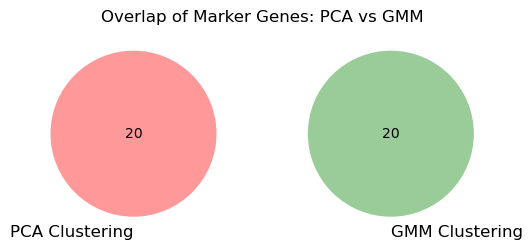

In [77]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd

# Load gene lists
df_pca = pd.read_csv("top_marker_genes_per_pca_cluster.csv")
df_gmm = pd.read_csv("top_marker_genes_per_gmm_cluster.csv")

# Extract gene sets
genes_pca = set(df_pca["Gene"])
genes_gmm = set(df_gmm["Gene"])

# Plot Venn diagram
plt.figure(figsize=(6, 5))
venn2(
    [genes_pca, genes_gmm],
    set_labels=("PCA Clustering", "GMM Clustering")
)
plt.title("Overlap of Marker Genes: PCA vs GMM")
plt.show()

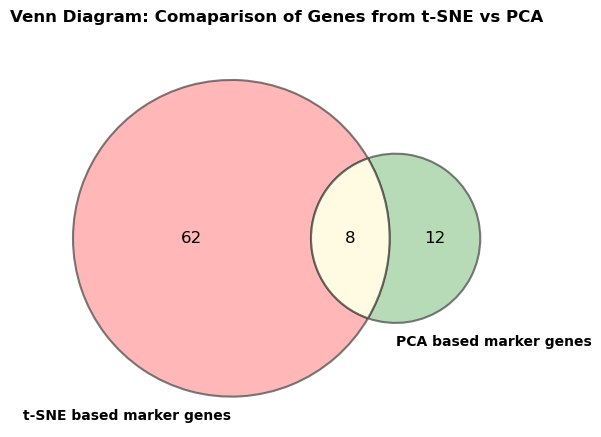

In [78]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Inputs 
cluster_genes = set(df_cluster["Gene"])
pca_genes = set(df_pca["Gene"])

# Plot
plt.figure(figsize=(6, 6))
v = venn2(
    [cluster_genes, pca_genes],
    set_labels=("t-SNE based marker genes", "PCA based marker genes"),
    set_colors=("#ff9999", "#99cc99"),
    alpha=0.7
)

# Customise text and borders
for text in v.set_labels:
    text.set_fontsize(10)
    text.set_fontweight("bold")

for text in v.subset_labels:
    if text:
        text.set_fontsize(12)

for patch in v.patches:
    if patch:
        patch.set_edgecolor("#444")
        patch.set_linewidth(1.5)

plt.title("Venn Diagram: Comaparison of Genes from t-SNE vs PCA", fontsize=12, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

Dropdown(description='Compare:', options=('PCA vs t-SNE', 'PCA vs GMM', 't-SNE vs GMM', 'Compare All Three'), …

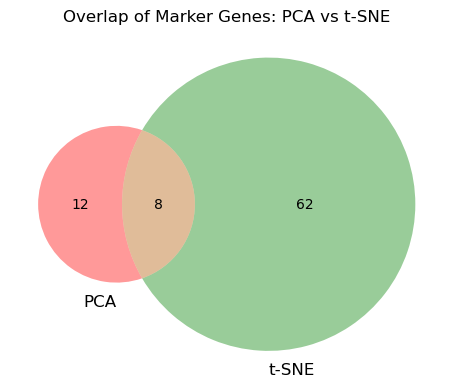

In [79]:
from matplotlib_venn import venn2, venn3
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import pandas as pd

# --- Load all three gene lists ---
df_pca = pd.read_csv("top_marker_genes_per_pca_cluster.csv")
df_tsne = pd.read_csv("top_marker_genes_per_cluster_tsne.csv")
df_gmm = pd.read_csv("top_marker_genes_per_gmm_cluster.csv")

genes_pca = set(df_pca["Gene"])
genes_tsne = set(df_tsne["Gene"])
genes_gmm = set(df_gmm["Gene"])

# --- Define dropdown widget ---
compare_options = [
    "PCA vs t-SNE",
    "PCA vs GMM",
    "t-SNE vs GMM",
    "Compare All Three"
]

dropdown = widgets.Dropdown(
    options=compare_options,
    value="PCA vs t-SNE",
    description="Compare:"
)

# --- Define plot function ---
def plot_venn(selection):
    clear_output(wait=True)
    
    # Display dropdown 
    display(dropdown)
    
    # Start new figure
    plt.figure(figsize=(6, 4))
    
    if selection == "PCA vs t-SNE":
        venn2([genes_pca, genes_tsne], set_labels=("PCA", "t-SNE"))
        plt.title("Overlap of Marker Genes: PCA vs t-SNE")
        
    elif selection == "PCA vs GMM":
        venn2([genes_pca, genes_gmm], set_labels=("PCA", "GMM"))
        plt.title("Overlap of Marker Genes: PCA vs GMM")
        
    elif selection == "t-SNE vs GMM":
        venn2([genes_tsne, genes_gmm], set_labels=("t-SNE", "GMM"))
        plt.title("Overlap of Marker Genes: t-SNE vs GMM")
        
    elif selection == "Compare All Three":
        venn3([genes_pca, genes_tsne, genes_gmm], set_labels=("PCA", "t-SNE", "GMM"))
        plt.title("Overlap of Marker Genes: PCA vs t-SNE vs GMM")
    
    plt.tight_layout()
    plt.show()

# --- set up interaction ---
dropdown.observe(lambda change: plot_venn(change.new), names="value")
display(dropdown)
plot_venn(dropdown.value)

In [80]:
import pandas as pd
from IPython.display import display, HTML

# Load data
df_cluster = pd.read_csv("top_marker_genes_per_cluster_tsne.csv")
df_pca = pd.read_csv("top_marker_genes_per_pca_cluster.csv")


# Create gene sets
genes_cluster = set(df_cluster["Gene"])
genes_pca = set(df_pca["Gene"])
all_genes = sorted(genes_cluster | genes_pca)

# Determine source method
rows = []
for gene in all_genes:
    if gene in genes_cluster and gene in genes_pca:
        method = "Both"
    elif gene in genes_cluster:
        method = "t-SNE Only"
    else:
        method = "PCA Only"
    rows.append({
        "Gene": gene,
        "Detected In": method,
        "HPA Link": f'<a href="https://www.proteinatlas.org/search/{gene}" target="_blank">{gene}</a>'
    })

df_combined = pd.DataFrame(rows)
df_combined = df_combined.sort_values(by="Detected In", key=lambda x: x.map({"Both": 0, "t-SNE Only": 1, "PCA Only": 2}))

# Colour map for Detected In column
def get_color(method):
    return {
        "Both": "#d0f0c0",
        "t-SNE Only": "#dceeff",
        "PCA Only": "#fff9cc"
    }[method]

# Build HTML table
styled_html = f"""
<div style="max-height: 500px; overflow-y: auto; border: 1px solid #ddd; border-radius: 6px; font-family: Arial, sans-serif;">
  <table style="border-collapse: collapse; width: 100%;">
    <thead style="background-color: #e0e0e0; position: sticky; top: 0; z-index: 1;">
      <tr>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Gene</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">Detected In</th>
        <th style="padding: 10px; border: 1px solid #ccc; text-align: left; font-weight: bold; color: #000;">HPA Link</th>
      </tr>
    </thead>
    <tbody>
"""

for _, row in df_combined.iterrows():
    cell_color = get_color(row['Detected In'])
    styled_html += f"""
      <tr>
        <td style="padding: 8px; border: 1px solid #eee;">{row['Gene']}</td>
        <td style="padding: 8px; border: 1px solid #eee; background-color: {cell_color}; color: #222; font-weight: 500;">
{row['Detected In']}</td>
        <td style="padding: 8px; border: 1px solid #eee;">{row['HPA Link']}</td>
      </tr>
    """

styled_html += """
    </tbody>
  </table>
</div>
"""

# Show it
display(HTML(styled_html))

In [81]:
# Save the combined gene table to a CSV file
output_filename = "combined_marker_genes_with_source.csv"
df_combined.drop(columns=["HPA Link"]).to_csv(output_filename, index=False)

print(f"CSV file saved as: {output_filename}")

CSV file saved as: combined_marker_genes_with_source.csv


## Confirmed / Reported Prognostic Biomarkers in Cancer

These genes were identified through unsupervised machine learning (t-SNE and PCA-based clustering) and validated via external sources (e.g., Human Protein Atlas, peer-reviewed literature). They show potential relevance as **prognostic cancer biomarkers**.

---

### Reported by **Both PCA and t-SNE Methods**

| **Gene** | **Cancer Relevance** | **Supporting Evidence** |
|----------|----------------------|--------------------------|
| **RAB5A** | High expression linked to poor prognosis and enhanced response to HER2-targeted therapy in breast cancer. Also involved in exosome release and macrophage modulation. | [Nature Communications, 2021](https://www.nature.com/articles/s41467-021-26018-z), [HPA](https://www.proteinatlas.org/ENSG00000144566-RAB5A) |
| **RAP1B** | Regulates cell adhesion, invasion, and metastasis. Overexpressed in gliomas and pancreatic cancer. | [Spandidos Publication](https://www.spandidos-publications.com/10.3892/or.2015.4234#:~:text=The%20expression%20of%20RAP1B%20and%20HIF%2D1%CE%B1%20proteins%20was%20associated,a%20biomarker%20for%20prognosis%20prediction.), [NCBI Gene](https://www.ncbi.nlm.nih.gov/gene/5908) |
| **PCNP** | Implicated in cell cycle control and apoptosis regulation. Linked to glioblastoma progression. | [ResearchGate](https://www.researchgate.net/publication/341757225_PCNP_promotes_ovarian_cancer_progression_by_accelerating_b-catenin_nuclear_accumulation_and_triggering_EMT_transition) |
| **VPS26A** | Component of retromer complex, involved in receptor recycling. Upregulated in various cancers. | [MDPI](https://www.mdpi.com/1648-9144/61/7/1283) |
| **TWF1** | Facilitates actin remodelling and promotes cancer cell invasion. Overexpressed in breast and pancreatic cancers. | [PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC10267903/) |

---

### Reported Only by **PCA-Based Clustering**

| **Gene** | **Cancer Relevance** | **Supporting Evidence** |
|----------|----------------------|--------------------------|
| **ALKBH7** | Involved in apoptosis pathways; altered expression seen in colorectal and liver cancers. | [PubMed](https://pubmed.ncbi.nlm.nih.gov/35222541/) |
| **NR1H2** | Regulates immune and lipid metabolism; implicated in breast and prostate tumourigenesis. | [ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0960076021000157) |
| **IGFBP6** | Known tumour suppressor. Prognostic marker in breast, ovarian, and colorectal cancers. | [PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC5356544/#:~:text=Positive%20IGFBP6%20expression%20was%20associated,distant%20metastasis%20in%20NPC%20patients.), [HPA](https://www.proteinatlas.org/ENSG00000167779-IGFBP6/pathology) |
| **GSN** | Plays a role in actin filament dynamics. Prognostic in breast and lung cancer. | [PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC10076574/) |
| **TGFBI** | Key ECM protein. High expression linked to metastasis and poor prognosis in lung and pancreatic cancer. | [HPA](https://www.proteinatlas.org/ENSG00000120708-TGFBI/pathology), [PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC4348825/) |

---

### 🔹 Reported Only by **t-SNE Clustering**

| **Gene** | **Cancer Relevance** | **Supporting Evidence** |
|----------|----------------------|--------------------------|
| **THOC7** | Involved in mRNA processing and export; dysregulation linked to cell cycle and proliferation pathways. | [NCBI Gene](https://www.ncbi.nlm.nih.gov/gene/79733) |
